In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [24]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers , models
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial.distance import euclidean
from sklearn.preprocessing import MinMaxScaler
import random
import tensorflow as tf
from tensorflow.keras import layers, models,optimizers
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import pdist, squareform
physical_devices = tf.config.list_physical_devices('GPU')
print(physical_devices)
import warnings
warnings.filterwarnings("ignore")

import torch
import torch.nn as nn
import torch.optim as optim

import tensorflow as tf 
from keras.layers import Conv1D, Bidirectional, Flatten, Reshape, GRU, Dense, Activation, Dropout, LSTM, MaxPooling1D, Input, Conv1DTranspose, GlobalAveragePooling1D, Attention, LeakyReLU, BatchNormalization, Concatenate
from tensorflow.keras.utils import plot_model
from keras.models import Sequential, load_model, Model 
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau ,EarlyStopping
from keras.optimizers import Adam
from keras.regularizers import l1
from numpy.random import randn, randint
import torch.nn.functional as F
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers , models
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial.distance import euclidean
from sklearn.preprocessing import MinMaxScaler
import random
import tensorflow as tf
from tensorflow.keras import layers, models,optimizers

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


In [25]:
df1 = pd.read_csv('/kaggle/input/uk-electrical-load/House_1.csv', index_col=0, parse_dates=['Time'])
df2 = pd.read_csv('/kaggle/input/uk-electrical-load/House_2.csv', index_col=0, parse_dates=['Time'])
df3 = pd.read_csv('/kaggle/input/uk-electrical-load/House_3.csv', index_col=0, parse_dates=['Time'])
df4 = pd.read_csv('/kaggle/input/uk-electrical-load/House_4.csv', index_col=0, parse_dates=['Time'])
df5 = pd.read_csv('/kaggle/input/uk-electrical-load/House_5.csv', index_col=0, parse_dates=['Time'])
df6 = pd.read_csv('/kaggle/input/uk-electrical-load/House_6.csv', index_col=0, parse_dates=['Time'])
df7 = pd.read_csv('/kaggle/input/uk-electrical-load/House_7.csv', index_col=0, parse_dates=['Time'])
df8 = pd.read_csv('/kaggle/input/uk-electrical-load/House_8.csv', index_col=0, parse_dates=['Time'])
df9 = pd.read_csv('/kaggle/input/uk-electrical-load/House_9.csv', index_col=0, parse_dates=['Time'])
df10 = pd.read_csv('/kaggle/input/uk-electrical-load/House_10.csv', index_col=0, parse_dates=['Time'])
df11 = pd.read_csv('/kaggle/input/uk-electrical-load/House_11.csv', index_col=0, parse_dates=['Time'])
# df12 = pd.read_csv('/kaggle/input/house12/House_12.csv', parse_dates=['Time'])
# df13 = pd.read_csv('/kaggle/input/house13/House_13.csv', parse_dates=['Time'])
# df14 = pd.read_csv('/kaggle/input/house14/House_14.csv', parse_dates=['Time'])
# df15 = pd.read_csv('/kaggle/input/house15/House_15.csv', parse_dates=['Time'])
# df16 = pd.read_csv('/kaggle/input/house16/House_16.csv', parse_dates=['Time'])
# df17 = pd.read_csv('/kaggle/input/house17/House_17.csv', parse_dates=['Time'])
# df18 = pd.read_csv('/kaggle/input/house18/House_18.csv', parse_dates=['Time'])
# df19 = pd.read_csv('/kaggle/input/house19/House_19.csv', parse_dates=['Time'])
# df20 = pd.read_csv('/kaggle/input/house20/House_20.csv', parse_dates=['Time'])

In [26]:
# Rename the applicances according to the metadata provided, for more readability

df1 = df1.rename(index=str, columns={
    "Appliance1":"Fridge",
    "Appliance2":"Chest Freezer",
    "Appliance3":"Upright Freezer",
    "Appliance4":"Tumble Dryer",
    "Appliance5":"Washing Machine",
    "Appliance6":"Dishwasher",
    "Appliance7":"Computer Site",
    "Appliance8":"Television Site",
    "Appliance9":"Electric Heater"
})
# Rename the applicances according to the metadata provided, for more readability
df2 = df2.rename(index=str, columns={
    "Appliance1":"Fridge-Freezer",
    "Appliance2":"Washing Machine",
    "Appliance3":"Dishwasher",
    "Appliance4":"Television",
    "Appliance5":"Microwave",
    "Appliance6":"Toaster",
    "Appliance7":"Hi-Fi",
    "Appliance8":"Kettle",
    "Appliance9":"Oven Extractor Fan"
})
# Rename the applicances according to the metadata provided, for more readability
df3 = df3.rename(index=str, columns={
    "Appliance1":"Toaster",
    "Appliance2":"Fridge-Freezer",
    "Appliance3":"Freezer",
    "Appliance4":"Tumble Dryer",
    "Appliance5":"Dishwasher",
    "Appliance6":"Washing Machine",
    "Appliance7":"Television",
    "Appliance8":"Microwave",
    "Appliance9":"Kettle"
})
# Rename the applicances according to the metadata provided, for more readability
df4 = df4.rename(index=str, columns={

    "Appliance1":"Fridge",
    "Appliance2":"Freezer",
    "Appliance3":"Fridge-Freezer",
    "Appliance4":"Washing Machine(1)",
    "Appliance5":"Washing Machine(2)",
    "Appliance6":"Computer Site",
    "Appliance7":"Television Site",
    "Appliance8":"Microwave",
    "Appliance9":"Kettle"
})

# Rename the applicances according to the metadata provided, for more readability
df6 = df6.rename(index=str, columns={
    "Appliance1":"Freezer",
    "Appliance2":"Washing Machine",
    "Appliance3":"Dishwasher",
    "Appliance4":"MJY Computer",
    "Appliance5":"Television Site",
    "Appliance6":"Microwave",
    "Appliance7":"Kettle",
    "Appliance8":"Toaster",
    "Appliance9":"PGM Computer"
})

# Rename the applicances according to the metadata provided, for more readability
df5 = df5.rename(index=str, columns={
    "Appliance1":"Fridge-Freezer",
    "Appliance2":"Tumble Dryer",
    "Appliance3":"Washing Machine",
    "Appliance4":"Dishwasher",
    "Appliance5":"Computer Site",
    "Appliance6":"Television Site",
    "Appliance7":"Combination Microwave",
    "Appliance8":"Kettle",
    "Appliance9":"Toaster"
})

# Rename the applicances according to the metadata provided, for more readability

# Rename the applicances according to the metadata provided, for more readability
df7 = df7.rename(index=str, columns={
    "Appliance1":"Fridge",
    "Appliance2":"Freezer (Garage)",
    "Appliance3":"Freezer",
    "Appliance4":"Tumble Dryer",
    "Appliance5":"Washing Machine",
    "Appliance6":"Dishwasher",
    "Appliance7":"Television Site",
    "Appliance8":"Toaster",
    "Appliance9":"Kettle"
})


# Rename the applicances according to the metadata provided, for more readability
df8 = df8.rename(index=str, columns={
    "Appliance1":"Fridge",
    "Appliance2":"Freezer",
    "Appliance3":"Dryer",
    "Appliance4":"Washing Machine",
    "Appliance5":"Toaster",
    "Appliance6":"Computer",
    "Appliance7":"Television Site",
    "Appliance8":"Microwave",
    "Appliance9":"Kettle"
})
# Rename the applicances according to the metadata provided, for more readability
df9 = df9.rename(index=str, columns={
    "Appliance1":"Fridge-Freezer",
    "Appliance2":"Washer Dryer",
    "Appliance3":"Washing Machine",
    "Appliance4":"Dishwasher",
    "Appliance5":"Television Site",
    "Appliance6":"Microwave",
    "Appliance7":"Kettle",
    "Appliance8":"Hi-Fi",
    "Appliance9":"Electric Heater"
})
# Rename the applicances according to the metadata provided, for more readability
df10 = df10.rename(index=str, columns={
    "Appliance1":"Magimix (Blender)",
    "Appliance2":"Freezer",
    "Appliance3":"Chest Freezer (In Garage)",
    "Appliance4":"Fridge-Freezer",
    "Appliance5":"Washing Machine",
    "Appliance6":"Dishwasher",
    "Appliance7":"Television Site",
    "Appliance8":"Microwave",
    "Appliance9":"Kenwood KMix"
})

df11 = df11.rename(index=str, columns={
    "Appliance1":"Fridge",
    "Appliance2":"Fridge-Freezer",
    "Appliance3":"Washing Machine",
    "Appliance4":"Dishwasher",
    "Appliance5":"Computer Site",
    "Appliance6":"Microwave",
    "Appliance7":"Kettle",
    "Appliance8":"Router",
    "Appliance9":"Hi-Fi"
})

# df12 = df12.rename(index=str, columns={
#     "Appliance1":"Fridge-Freezer",
#     "Appliance2":"Television Site(Lounge)",
#     "Appliance3":"Microwave",
#     "Appliance4":"Kettle",
#     "Appliance5":"Toaster",
#     "Appliance6":"Television Site(Bedroom)",
#     "Appliance7":"Not Used",
#     "Appliance8":"Not Used",
#     "Appliance9":"Not Used"
# })

# df13 = df13.rename(index=str, columns={
#     "Appliance1":"Television Site(1)",
#     "Appliance2":"Unknown",
#     "Appliance3":"Washing Machine",
#     "Appliance4":"Dishwasher",
#     "Appliance5":"Tumble Dryer",
#     "Appliance6":"Television Site(2)",
#     "Appliance7":"Computer Site",
#     "Appliance8":"Microwave",
#     "Appliance9":"Kettle"
# })

# df15 = df15.rename(index=str, columns={
#     "Appliance1":"Fridge-Freezer",
#     "Appliance2":"Tumble Dryer",
#     "Appliance3":"Washing Machine",
#     "Appliance4":"Dishwasher",
#     "Appliance5":"Computer Site",
#     "Appliance6":"Television Site",
#     "Appliance7":"Microwave",
#     "Appliance8":"Kettle",
#     "Appliance9":"Toaster"
# })
# df16 = df16.rename(index=str, columns={
#     "Appliance1":"Fridge-Freezer (1)",
#     "Appliance2":"Fridge-Freezer (2)",
#     "Appliance3":"Electric Heater (1)",
#     "Appliance4":"Electric Heater (2)",
#     "Appliance5":"Washing Machine",
#     "Appliance6":"Dishwasher",
#     "Appliance7":"Computer Site",
#     "Appliance8":"Television Site",
#     "Appliance9":"Dehumidifier/Heater"
# })

# df17 = df17.rename(index=str, columns={
#     "Appliance1":"Freezer (Garage)",
#     "Appliance2":"Fridge-Freezer",
#     "Appliance3":"Tumble Dryer (Garage)",
#     "Appliance4":"Washing Machine",
#     "Appliance5":"Computer Site",
#     "Appliance6":"Television Site",
#     "Appliance7":"Microwave",
#     "Appliance8":"Kettle",
#     "Appliance9":"Plug Site (Bedroom)"
# })

# df18 = df18.rename(index=str, columns={
#     "Appliance1":"Fridge(garage)",
#     "Appliance2":"Freezer(garage)",
#     "Appliance3":"Fridge-Freezer",
#     "Appliance4":"Washer Dryer(garage)",
#     "Appliance5":"Washing Machine",
#     "Appliance6":"Dishwasher",
#     "Appliance7":"Desktop Computer",
#     "Appliance8":"Television Site",
#     "Appliance9":"Microwave"
# })

# df19 = df19.rename(index=str, columns={
#     "Appliance1":"Fridge & Freezer",
#     "Appliance2":"Washing Machine",
#     "Appliance3":"Television Site",
#     "Appliance4":"Microwaver",
#     "Appliance5":"Kettle",
#     "Appliance6":"Toaster",
#     "Appliance7":"Bread-maker",
#     "Appliance8":"Lamp (80Watts)",
#     "Appliance9":"Hi-Fi"
# })


# df20 = df20.rename(index=str, columns={
#     "Appliance1":"Fridge",
#     "Appliance2":"Freezer",
#     "Appliance3":"Tumble Dryer",
#     "Appliance4":"Washing Machine",
#     "Appliance5":"Dishwasher",
#     "Appliance6":"Computer Site",
#     "Appliance7":"Television Site",
#     "Appliance8":"Microwave",
#     "Appliance9":"Kettle"
# })

# df21 = df21.rename(index=str, columns={
#     "Appliance1":"Fridge-Freezer",
#     "Appliance2":"Tumble Dryer",
#     "Appliance3":"Washing Machine",
#     "Appliance4":"Dishwasher",
#     "Appliance5":"Food Mixer",
#     "Appliance6":"Television",
#     "Appliance7":"Kettle/Toaster",
#     "Appliance8":"Vivarium",
#     "Appliance9":"Pond Pump"
# })




In [22]:
df1.describe()

,Unix,Aggregate,Fridge,Chest Freezer,Upright Freezer,Tumble Dryer,Washing Machine,Dishwasher,Computer Site,Television Site,Electric Heater
count,6.960008e+06,6.960008e+06,6.960008e+06,6.960008e+06,6.960008e+06,6.960008e+06,6.960008e+06,6.960008e+06,6.960008e+06,6.960008e+06,6.960008e+06
mean,1.409144e+09,4.811385e+02,1.753831e+01,1.655047e+01,2.900873e+01,1.844441e+00,1.102860e+01,1.116492e+01,2.473279e+00,5.803410e+00,6.947503e+01
std,1.579852e+07,8.128927e+02,4.309098e+01,2.883743e+01,3.800527e+01,5.611159e+01,1.439160e+02,1.567903e+02,1.192701e+01,1.317050e+01,2.557986e+02
min,1.381324e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.396639e+09,1.850000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,1.409931e+09,2.420000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.422401e+09,4.270000e+02,0.000000e+00,4.500000e+01,7.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,1.436529e+09,2.915900e+04,3.584000e+03,3.452000e+03,3.657000e+03,3.584000e+03,3.072000e+03,2.525000e+03,2.094000e+03,3.584000e+03,2.119000e+03


Fridge

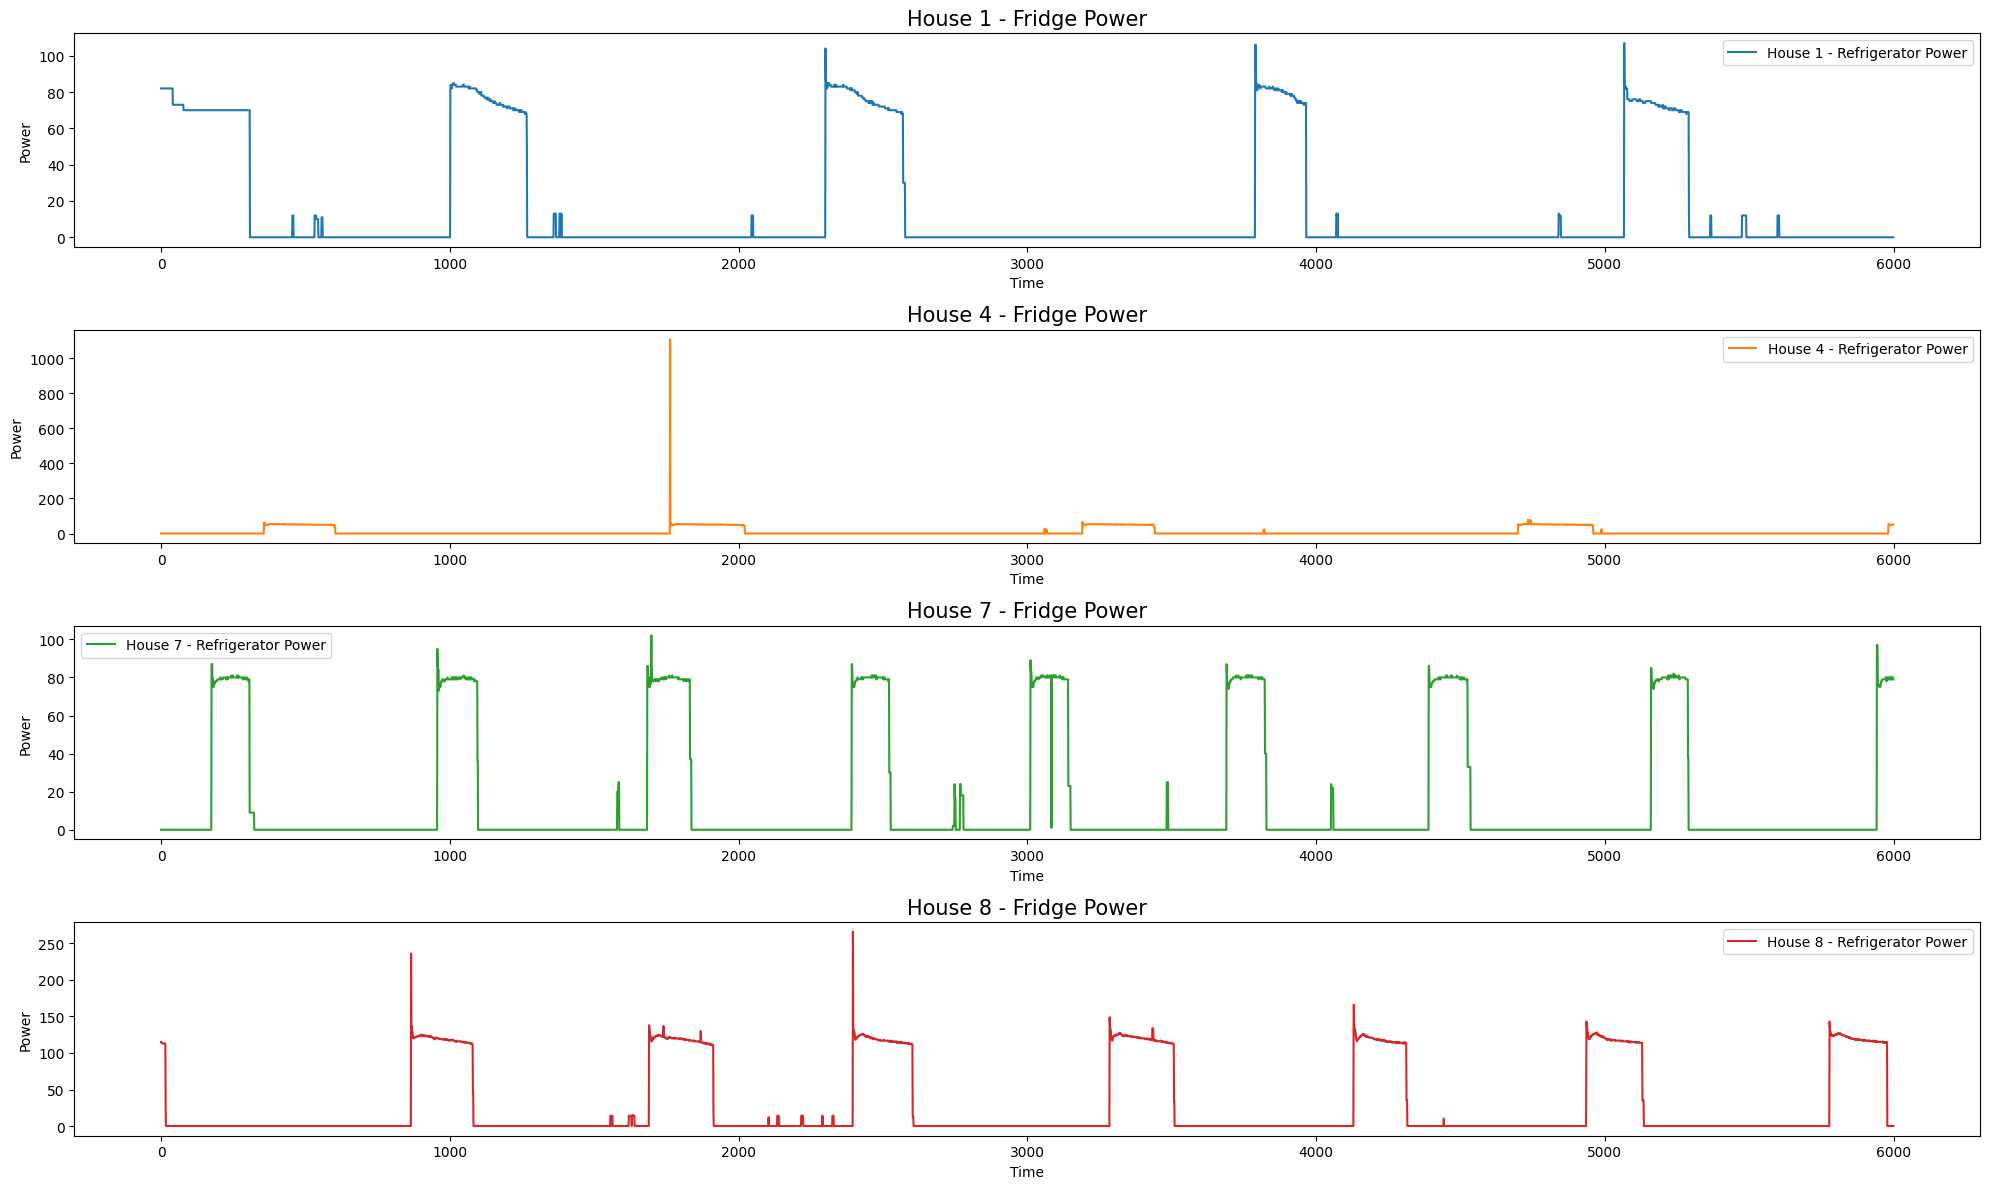

In [27]:
# refrigator : 1,4,7,8
# washing machine : 1 2 5 6
# kettle: 2,3,4,5,6,9,11
appliance = "Fridge"
X1 = df1['Aggregate'].values.astype(np.float32)
y1 = df1[appliance].values.astype(np.float32)
# X3 = df3['Aggregate'].values.astype(np.float32)
# y3 = df3[appliance].values.astype(np.float32)
X4 = df4['Aggregate'].values.astype(np.float32)
y4 = df4[appliance].values.astype(np.float32)
# X5 = df5['Aggregate'].values.astype(np.float32)
# y5 = df5[appliance].values.astype(np.float32)
# X6 = df6['Aggregate'].values.astype(np.float32)
# y6 = df6[appliance].values.astype(np.float32)
# X9 = df9['Aggregate'].values.astype(np.float32)
# y9 = df9[appliance].values.astype(np.float32)
# X11 = df11['Aggregate'].values.astype(np.float32)
# y11 = df11[appliance].values.astype(np.float32)
X7 = df7['Aggregate'].values.astype(np.float32)
y7 = df7[appliance].values.astype(np.float32)
X8 = df8['Aggregate'].values.astype(np.float32)
y8 = df8[appliance].values.astype(np.float32)
#2,3,4,5,6,9,11
X_list = [ X1 , X4 , X7 , X8]  # Aggregated power for each house
y_list = [ y1,y4,y7,y8]  # Refrigerator power for each house
fig, axes = plt.subplots(len(X_list), 1, figsize=(20, 12)) 
c = [1,4,7,8]
for i, (X,y)  in enumerate(zip(X_list,y_list)):
    ax = axes[i] 
    #ax.plot(X[10000:20000], color=f"C{i}", label=f'House {c[i]} - Aggregated Power')
    #ax.plot(y[10000:20000], linestyle='--', color=f"C{i}", label=f'House {c[i]} - Refrigerator Power')
    ax.plot(y[10000:16000], color=f"C{i}", label=f'House {c[i]} - Refrigerator Power')
    ax.set_title(f'House {c[i]} - Fridge Power', fontsize=15)
    ax.legend()
    ax.set_xlabel('Time')
    ax.set_ylabel('Power')

plt.tight_layout()
plt.show()

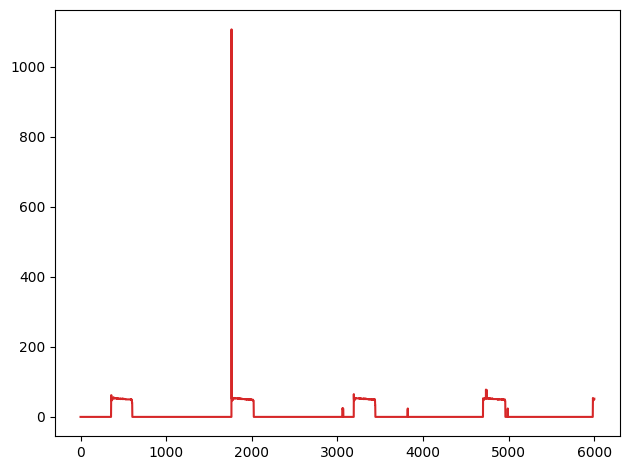

In [29]:
plt.plot(y_list[1][10000:16000], color=f"C{i}", label=f'House {c[i]} - Refrigerator Power')
plt.tight_layout()
plt.show()

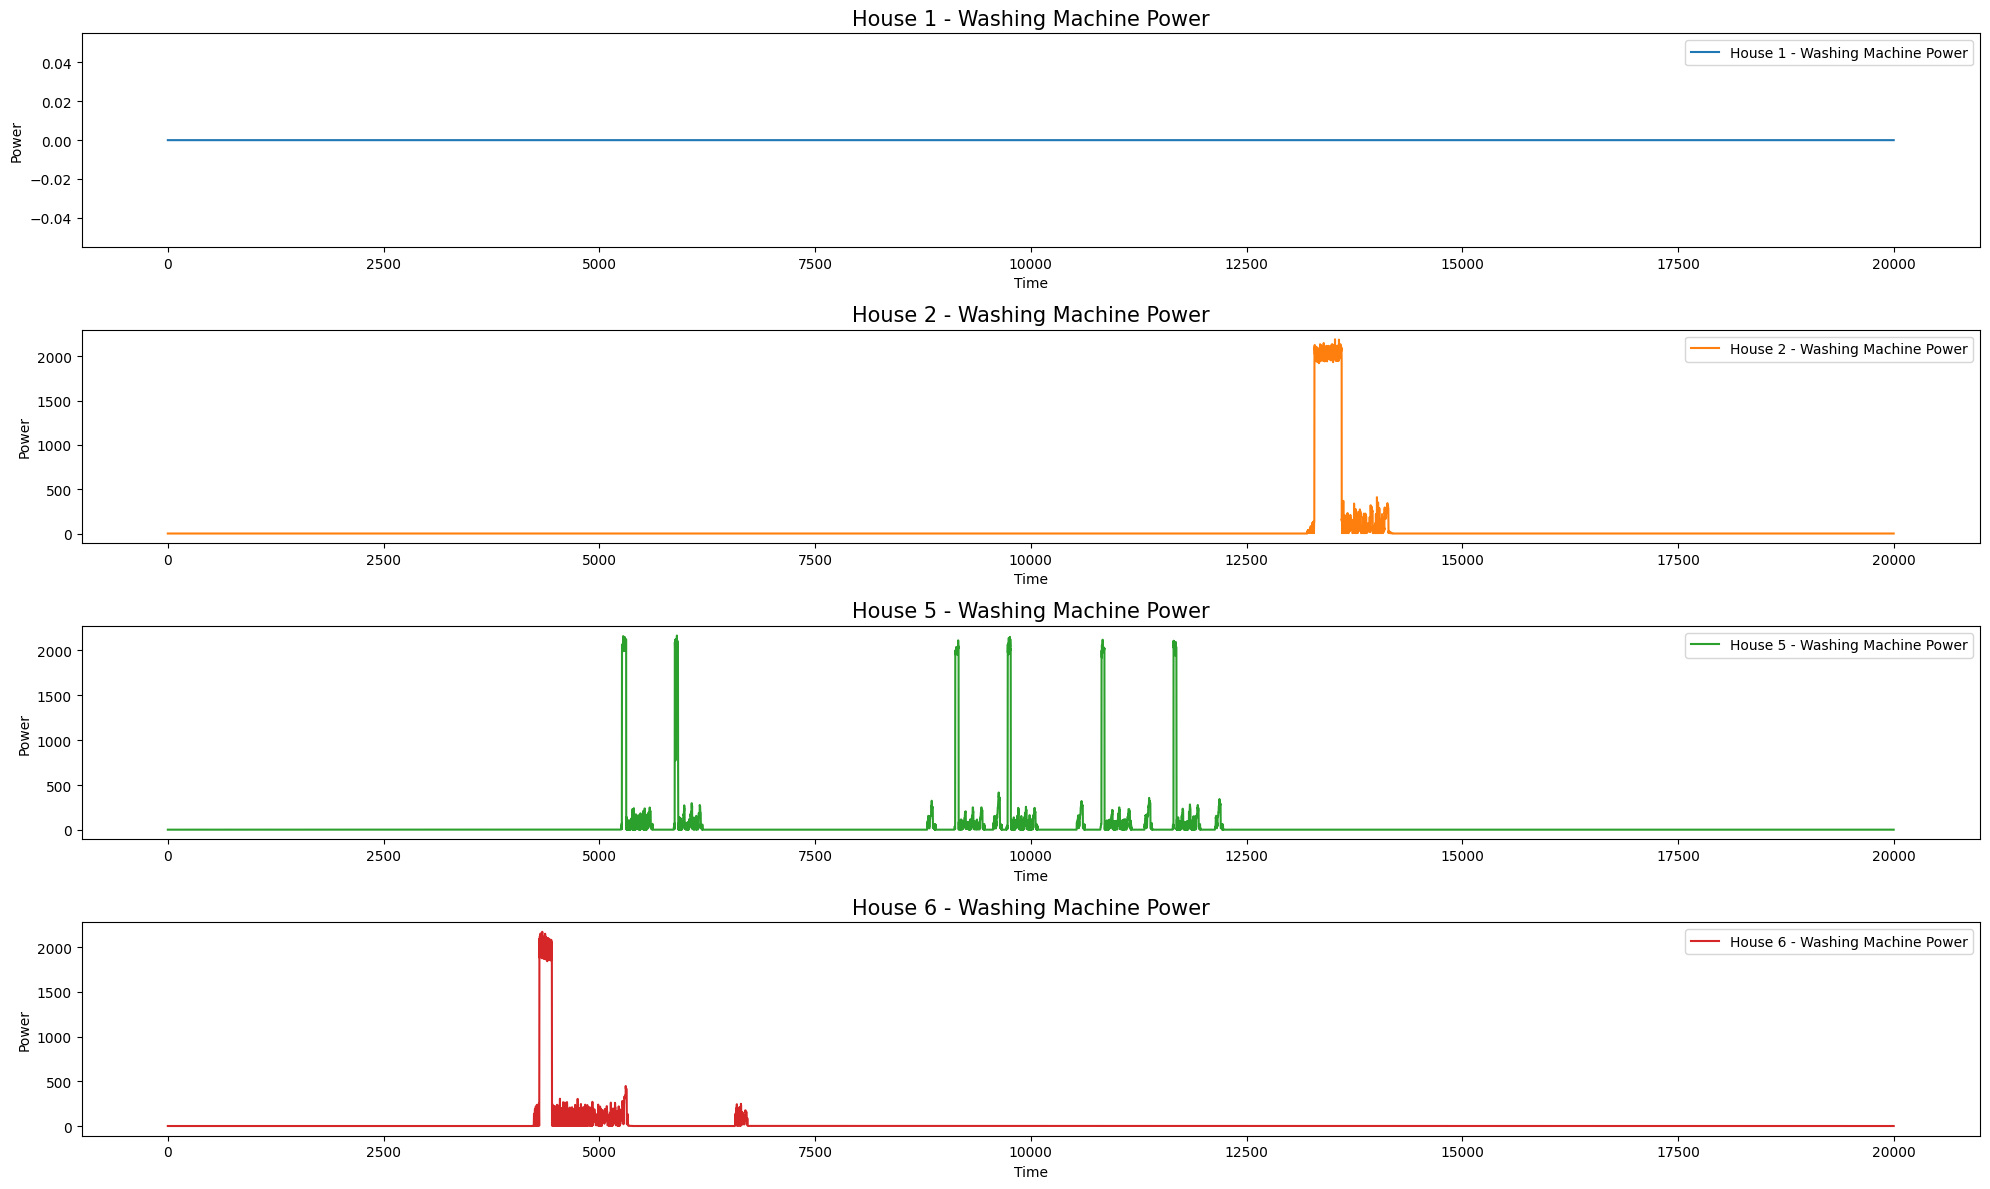

In [160]:
# refrigator : 1,4,7,8
# washing machine : 1 2 5 6
# kettle: 2,3,4,5,6,9,11
appliance = "Washing Machine"
X1 = df1['Aggregate'].values.astype(np.float32)
y1 = df1[appliance].values.astype(np.float32)
X2 = df2['Aggregate'].values.astype(np.float32)
y2 = df2[appliance].values.astype(np.float32)
# X3 = df3['Aggregate'].values.astype(np.float32)
# y3 = df3[appliance].values.astype(np.float32)
# X4 = df4['Aggregate'].values.astype(np.float32)
# y4 = df4[appliance].values.astype(np.float32)
X5 = df5['Aggregate'].values.astype(np.float32)
y5 = df5[appliance].values.astype(np.float32)
X6 = df6['Aggregate'].values.astype(np.float32)
y6 = df6[appliance].values.astype(np.float32)
# X9 = df9['Aggregate'].values.astype(np.float32)
# y9 = df9[appliance].values.astype(np.float32)
# X11 = df11['Aggregate'].values.astype(np.float32)
# y11 = df11[appliance].values.astype(np.float32)
# X7 = df7['Aggregate'].values.astype(np.float32)
# y7 = df7[appliance].values.astype(np.float32)
# X8 = df8['Aggregate'].values.astype(np.float32)
# y8 = df8[appliance].values.astype(np.float32)
#2,3,4,5,6,9,11
X_list = [ X1 , X2 , X5 , X6]  # Aggregated power for each house
y_list = [ y1,y2,y5,y6]  # Refrigerator power for each house
fig, axes = plt.subplots(len(X_list), 1, figsize=(20, 12)) 
c = [1,2,5,6]
for i, (X,y)  in enumerate(zip(X_list,y_list)):
    ax = axes[i] 
    #ax.plot(X[10000:20000], color=f"C{i}", label=f'House {c[i]} - Aggregated Power')
    #ax.plot(y[10000:20000], linestyle='--', color=f"C{i}", label=f'House {c[i]} - Refrigerator Power')
    ax.plot(y[20000:40000], color=f"C{i}", label=f'House {c[i]} - Washing Machine Power')
    ax.set_title(f'House {c[i]} - Washing Machine Power', fontsize=15)
    ax.legend()
    ax.set_xlabel('Time')
    ax.set_ylabel('Power')

plt.tight_layout()
plt.show()

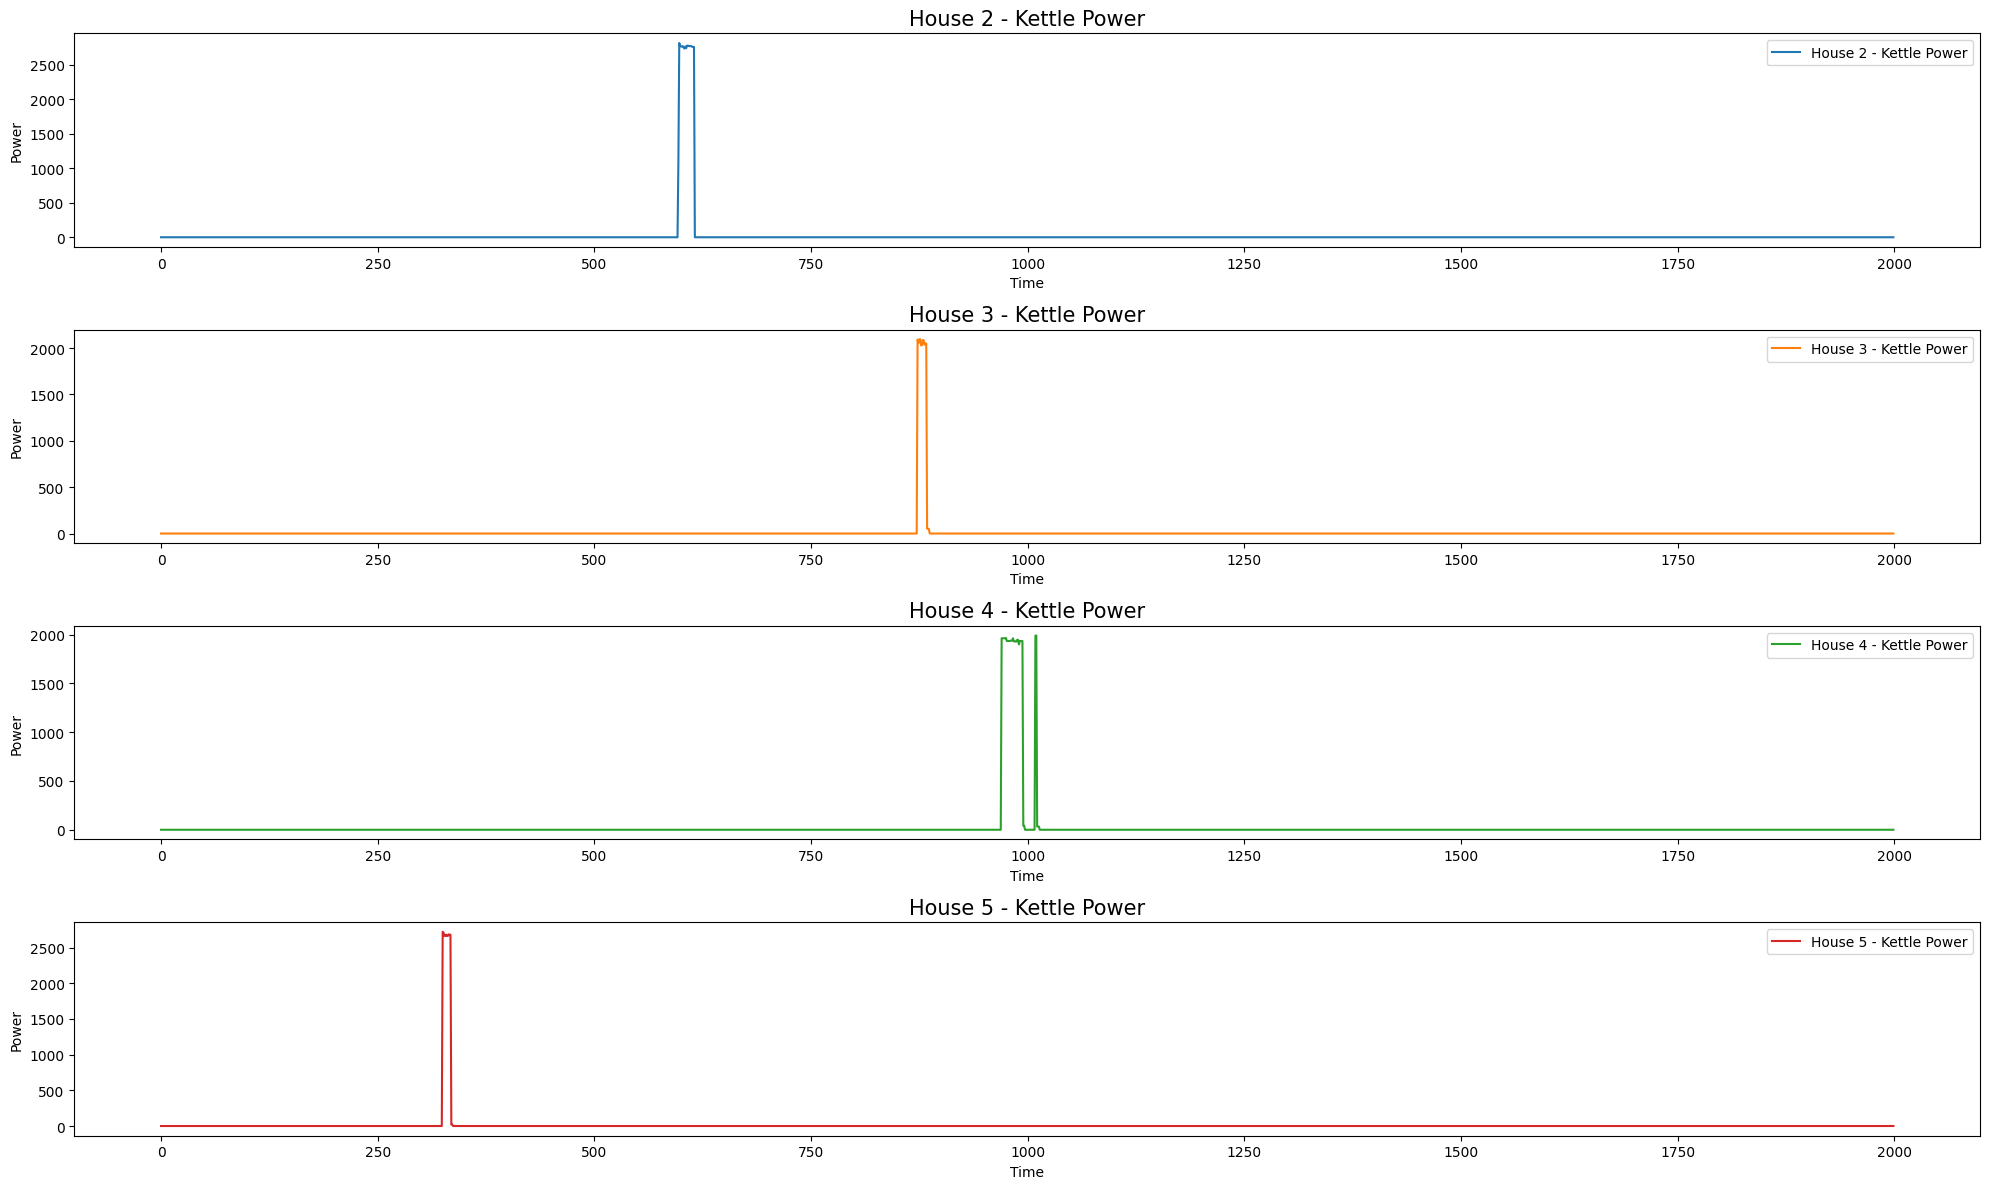

In [183]:
# refrigator : 1,4,7,8
# washing machine : 1 2 5 6
# kettle: 2,3,4,5,6,9,11
appliance = "Kettle"
# X1 = df1['Aggregate'].values.astype(np.float32)
# y1 = df1[appliance].values.astype(np.float32)
X2 = df2['Aggregate'].values.astype(np.float32)
y2 = df2[appliance].values.astype(np.float32)
X3 = df3['Aggregate'].values.astype(np.float32)
y3 = df3[appliance].values.astype(np.float32)
X4 = df4['Aggregate'].values.astype(np.float32)
y4 = df4[appliance].values.astype(np.float32)
X5 = df5['Aggregate'].values.astype(np.float32)
y5 = df5[appliance].values.astype(np.float32)
X6 = df6['Aggregate'].values.astype(np.float32)
y6 = df6[appliance].values.astype(np.float32)
X9 = df9['Aggregate'].values.astype(np.float32)
y9 = df9[appliance].values.astype(np.float32)
X11 = df11['Aggregate'].values.astype(np.float32)
y11 = df11[appliance].values.astype(np.float32)
# X7 = df7['Aggregate'].values.astype(np.float32)
# y7 = df7[appliance].values.astype(np.float32)
# X8 = df8['Aggregate'].values.astype(np.float32)
# y8 = df8[appliance].values.astype(np.float32)
#2,3,4,5,6,9,11
X_list = [ X2 ,X3,X4, X5]  # Aggregated power for each house
y_list = [ y2,y3,y4,y5]  # Refrigerator power for each house
fig, axes = plt.subplots(len(X_list), 1, figsize=(20, 12)) 
c = [2,3,4,5,6,9,11]
for i, (X,y)  in enumerate(zip(X_list,y_list)):
    ax = axes[i] 
    #ax.plot(X[10000:20000], color=f"C{i}", label=f'House {c[i]} - Aggregated Power')
    #ax.plot(y[10000:20000], linestyle='--', color=f"C{i}", label=f'House {c[i]} - Refrigerator Power')
    ax.plot(y[12000:14000], color=f"C{i}", label=f'House {c[i]} - Kettle Power')
    ax.set_title(f'House {c[i]} - Kettle Power', fontsize=15)
    ax.legend()
    ax.set_xlabel('Time')
    ax.set_ylabel('Power')

plt.tight_layout()
plt.show()

In [30]:
houses = list(range(1, 12))
df = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10,df11]
# df = [df1]
idx = []
appliance = "Fridge"
combined = []

def look_for (appliance):
    cand = []
    st=1
    for d in df:
        if appliance in d.columns:
            d.index=pd.to_datetime(d.index)
            df_hourly=d.resample('h').mean()
            df_monthly=df_hourly.resample('M').sum()
            df_avg_month=df_monthly.iloc[:,2:].groupby(df_monthly.index.month).mean()
            combined.append(df_avg_month[appliance].values)
            cand.append(d)
            idx.append(st)
        st+=1
    return cand

h = look_for(appliance)
print(idx)

[1, 4, 7, 8, 11]


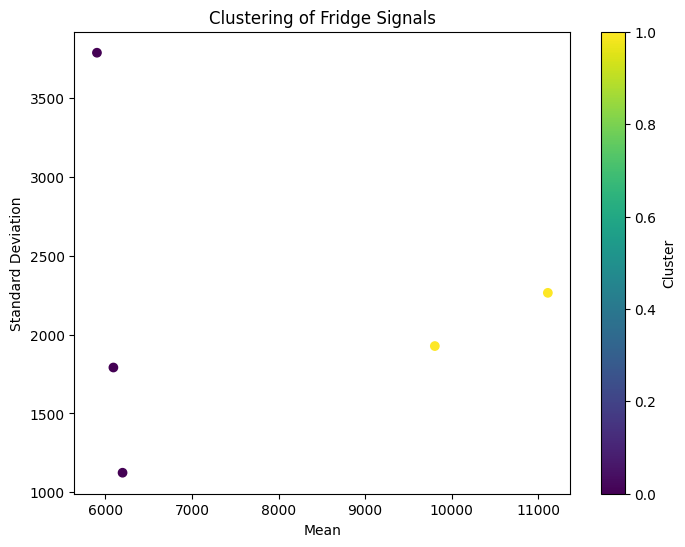

           Mean  Standard Deviation  House  Cluster
0  11111.100176         2264.071288      1        1
1   6197.906082         1124.311221      4        0
2   9805.478086         1926.962721      7        1
3   6092.189306         1790.964919      8        0
4   5902.141120         3785.467991     11        0


In [31]:
features = []
house_ids = []  # To keep track of the house corresponding to each feature
for i, signal in enumerate(combined):
    mean_value = np.mean(signal)
    std_value = np.std(signal)
    features.append([mean_value, std_value])
    house_ids.append(idx[i])  # Map the feature to the corresponding house

# Convert features to a DataFrame for better readability
features_df = pd.DataFrame(features, columns=["Mean", "Standard Deviation"])
features_df['House'] = house_ids  # Add the house ID to the DataFrame

# Apply K-Means Clustering
num_clusters = 2  # Specify the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
features_df['Cluster'] = kmeans.fit_predict(features)

# Visualize Clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(features_df["Mean"], features_df["Standard Deviation"], 
                       c=features_df["Cluster"], cmap='viridis')
plt.title(f"Clustering of {appliance} Signals")
plt.xlabel("Mean")
plt.ylabel("Standard Deviation")
plt.colorbar(scatter, label="Cluster")
plt.show()

# Print cluster assignments with house IDs
print(features_df)

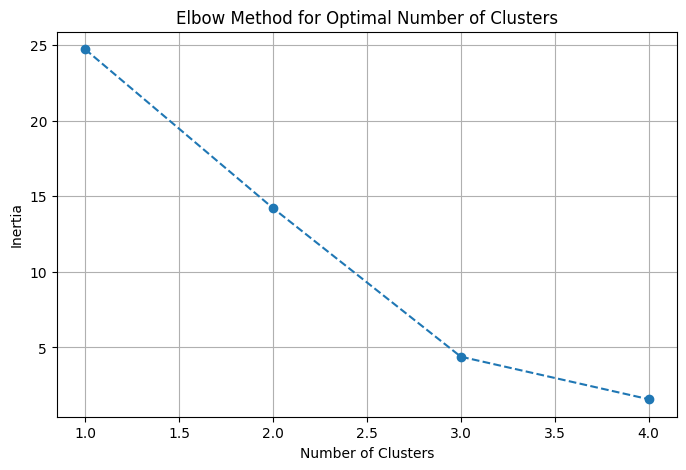

In [33]:
# Assuming 'combined' is your input data
# 'combined' should be a NumPy array of shape (n_samples, n_timestamps),
# where n_samples is the number of time series and n_timestamps is the length of each time series.

# For example:
# combined = np.array([[1, 2, 3, 4], [4, 3, 2, 1], ...])

# Step 1: Scale the data
scaler = MinMaxScaler()
scaled_data = np.array([scaler.fit_transform(series.reshape(-1, 1)).flatten() for series in combined])

# Step 2: Compute DTW distances between all pairs of time series
def dtw_distance(series1, series2):
    """
    Compute Dynamic Time Warping (DTW) distance between two time series.
    """
    n = len(series1)
    m = len(series2)
    dtw_matrix = np.zeros((n+1, m+1))
    dtw_matrix[0, :] = np.inf
    dtw_matrix[:, 0] = np.inf
    dtw_matrix[0, 0] = 0

    for i in range(1, n+1):
        for j in range(1, m+1):
            cost = abs(series1[i-1] - series2[j-1])
            dtw_matrix[i, j] = cost + min(dtw_matrix[i-1, j],    # insertion
                                          dtw_matrix[i, j-1],    # deletion
                                          dtw_matrix[i-1, j-1])  # match
    return dtw_matrix[n, m]

# Step 3: Compute pairwise DTW distances for all time series
dtw_distances = np.zeros((len(scaled_data), len(scaled_data)))

for i in range(len(scaled_data)):
    for j in range(i + 1, len(scaled_data)):
        distance = dtw_distance(scaled_data[i], scaled_data[j])
        dtw_distances[i, j] = distance
        dtw_distances[j, i] = distance

# Step 4: Elbow Method - Calculate inertia for different values of n_clusters
inertia_values = []
cluster_range = range(1, 5)  # Try from 1 to 10 clusters

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    # Use precomputed DTW distance matrix by setting metric='precomputed'
    kmeans.fit(dtw_distances)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Method to visualize the optimal number of clusters
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia_values, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


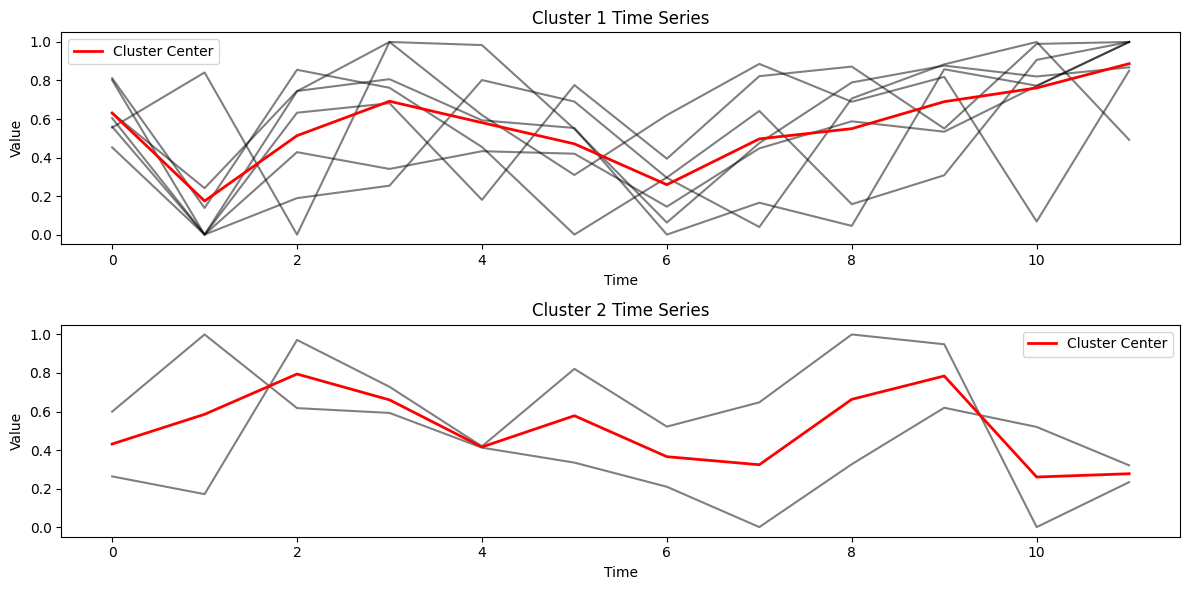

Labels for each time series: [1 0 0 0 0 0 0 0 1]
[2, 3, 4, 5, 6, 7, 8, 9, 11]


In [44]:
# Step 5: Use KMeans clustering on the DTW distance matrix with the optimal number of clusters (e.g., 3)
n_clusters = 2  # Based on the elbow method, or you can select your preferred number
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(dtw_distances)

# Step 6: Visualize the clusters and cluster centers
plt.figure(figsize=(12, 6))
for yi in range(n_clusters):
    plt.subplot(n_clusters, 1, yi + 1)
    plt.title(f'Cluster {yi + 1} Time Series')
    plt.xlabel('Time')
    plt.ylabel('Value')
    for xx in scaled_data[labels == yi]:
        plt.plot(xx, "k-", alpha=0.5)  # Black lines for time series in this cluster
    # Calculate and plot the cluster center (mean of the time series in the cluster)
    cluster_center = np.mean(scaled_data[labels == yi], axis=0)
    plt.plot(cluster_center, "r-", linewidth=2, label='Cluster Center')  # Red line for cluster center
    plt.legend()

plt.tight_layout()
plt.show()

# Step 7: Output the labels for each time series
print("Labels for each time series:", labels)
print(idx)

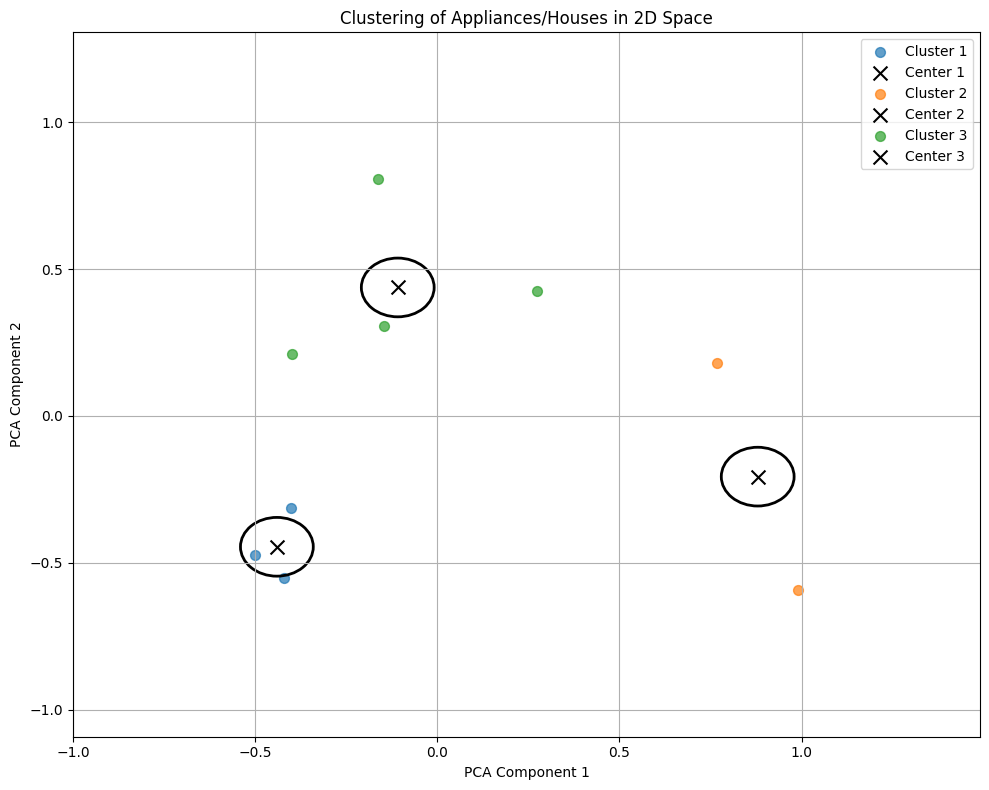

Labels for each time series: [1 2 0 2 1 2 2 0 0]


In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Example: Assume `scaled_data` is your time-series data (after DTW distance calculation and scaling)

# Step 1: Apply PCA to reduce the feature space to 2D
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Step 2: Perform KMeans clustering on the reduced data
n_clusters = 3  # Number of clusters you want (based on your elbow method or preference)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(reduced_data)

# Step 3: Visualize the clusters in 2D with circles around each cluster
plt.figure(figsize=(10, 8))

# Plot each cluster with a different color
for yi in range(n_clusters):
    # Select data points belonging to cluster `yi`
    cluster_points = reduced_data[labels == yi]
    
    # Scatter plot for the points in the current cluster
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {yi + 1}', alpha=0.7, s=50)

    # Plot the cluster center
    cluster_center = kmeans.cluster_centers_[yi]
    plt.scatter(cluster_center[0], cluster_center[1], color='black', marker='x', s=100, label=f'Center {yi + 1}')
    
    # Circle the cluster center for better visualization
    circle = plt.Circle((cluster_center[0], cluster_center[1]), 0.1, color='black', fill=False, linewidth=2)
    plt.gca().add_artist(circle)

# Step 4: Customize the plot for better separation
plt.title('Clustering of Appliances/Houses in 2D Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)

# Adjust the view limits for better visualization
plt.xlim(reduced_data[:, 0].min() - 0.5, reduced_data[:, 0].max() + 0.5)
plt.ylim(reduced_data[:, 1].min() - 0.5, reduced_data[:, 1].max() + 0.5)

# Show the plot
plt.tight_layout()
plt.show()

# Optional: Output the cluster labels and indices
print("Labels for each time series:", labels)


In [12]:
# take the houses for each cluster
cluster_number = 0

def extract_houses_for_cluster(label):
    p=[]
    for i in range(len(labels)):
        if (labels[i]==label):
            p.append(idx[i]);
    return p

houses = extract_houses_for_cluster(cluster_number)


In [187]:
appliance = "Fridge"
houses = [2, 3, 4, 6, 8, 9, 10, 11]

In [71]:
houses = [2, 3, 4, 6, 8, 9, 10, 11]
y_list = []

for house in houses:
    if house == 1:
        y_list.append(np.array(df1[appliance].values))  # For house 1
    elif house == 2:
        y_list.append(np.array(df2[appliance].values))  # For house 2
    elif house == 3:
        y_list.append(np.array(df3[appliance].values))  # For house 3
    elif house == 4:
        y_list.append(np.array(df4[appliance].values))  # For house 4
    elif house == 5:
        y_list.append(np.array(df5[appliance].values))  # For house 5
    elif house == 6:
        y_list.append(np.array(df6[appliance].values))
    elif house == 7:
        y_list.append(np.array(df7[appliance].values))  # For house 7
    elif house == 8:
        y_list.append(np.array(df8[appliance].values))  # For house 8
    elif house == 9:
        y_list.append(np.array(df9[appliance].values))  # For house 9
    elif house == 10:
        y_list.append(np.array(df10[appliance].values))  # For house 10
    elif house == 11:
        y_list.append(np.array(df11[appliance].values)) 

# df = pd.read_csv('/kaggle/input/house11/House_11.csv', parse_dates=['Time'])
# df.drop("Unix", axis=1,inplace=True)
# df.sort_values('Time', inplace=True)
# df['Time'] = pd.to_datetime(df['Time'])  # Convert to datetime
# # df.set_index('Time', inplace=True)
# # df = df.resample("5T").max()
# y_list.append(np.array(df['Appliance3'].values))

# df = pd.read_csv('/kaggle/input/house1/House_1.csv', parse_dates=['Time'])
# df.drop("Unix", axis=1,inplace=True)
# df.sort_values('Time', inplace=True)
# df['Time'] = pd.to_datetime(df['Time'])  # Convert to datetime
# # df.set_index('Time', inplace=True)
# # df = df.resample("5T").max()
# y_list.append(np.array(df['Appliance5'].values))

# df = pd.read_csv('/kaggle/input/house7/House_7.csv', parse_dates=['Time'])
# df.drop("Unix", axis=1,inplace=True)
# df.sort_values('Time', inplace=True)
# df['Time'] = pd.to_datetime(df['Time'])  # Convert to datetime
# # df.set_index('Time', inplace=True)
# # df = df.resample("5T").max()
# y_list.append(np.array(df['Appliance5'].values))

# df = pd.read_csv('/kaggle/input/house3/House_3.csv', parse_dates=['Time'])
# df.drop("Unix", axis=1,inplace=True)
# df.sort_values('Time', inplace=True)
# df['Time'] = pd.to_datetime(df['Time'])  # Convert to datetime
# # df.set_index('Time', inplace=True)
# # df = df.resample("5T").max()
# y_list.append(np.array(df['Appliance6'].values))

# df = pd.read_csv('/kaggle/input/house8/House_8.csv', parse_dates=['Time'])
# df.drop("Unix", axis=1,inplace=True)
# df.sort_values('Time', inplace=True)
# df['Time'] = pd.to_datetime(df['Time'])  # Convert to datetime
# # df.set_index('Time', inplace=True)
# # df = df.resample("5T").max()
# y_list.append(np.array(df['Appliance4'].values))

# df = pd.read_csv('/kaggle/input/house3/House_3.csv', parse_dates=['Time'])
# df.drop("Unix", axis=1,inplace=True)
# df.sort_values('Time', inplace=True)
# df['Time'] = pd.to_datetime(df['Time'])  # Convert to datetime
# # df.set_index('Time', inplace=True)
# # df = df.resample("5T").max()
# y_list.append(np.array(df['Appliance6'].values))

# df = pd.read_csv('/kaggle/input/house7/House_7.csv', parse_dates=['Time'])
# df.drop("Unix", axis=1,inplace=True)
# df.sort_values('Time', inplace=True)
# df['Time'] = pd.to_datetime(df['Time'])  # Convert to datetime
# # df.set_index('Time', inplace=True)
# # df = df.resample("5T").max()
# y_list.append(np.array(df['Appliance5'].values))

#pairs = [(1,2), (2,1), (3,0), (4,1), (5,1), (6,2), (7,0), (8,0), (9,2), (10,1), (11,1), (12,2), (13,0), (15,1), (16,1)]
#cluster 1 : washing_machine
# Max = 2441 :  houses = 2 , 10 , 11

#cluster 2 : washing_machine
# Max = 2566 :  houses = 3 , 8 , 7

# dishwasher : (house,appliance) (1,6) , (3,5)  (5,4) (6,3) , (7,6) ,(10,6)

In [72]:

window_size = 300

train_set = []    
for y in y_list:
    print(len(y))
    for i in range(0, len(y) - window_size + 1, window_size):
        window = y[i:i + window_size]
    
        if np.sum(window > 100) >= 10 :
            train_set.append(window)
train_set = np.array(train_set)
print("Extracted active wahsing_machine windows shape:", train_set.shape)

5733526
6994594
6760511
6241971
6118469
6169525
6739284
4431541
Extracted active wahsing_machine windows shape: (5549, 300)


In [75]:
from scipy.signal import find_peaks

def count_fluctuations(signal):
#     peaks, _ = find_peaks(signal, height=100, distance=10, prominence=50)
    peaks, _ = find_peaks(signal, height=50, distance=10, prominence=50) 
    return len(peaks)

non_noisy_signals = [signal for signal in train_set if count_fluctuations(signal) < 1]

In [136]:
non_noisy_signals = train_set

In [76]:
len(non_noisy_signals)

186

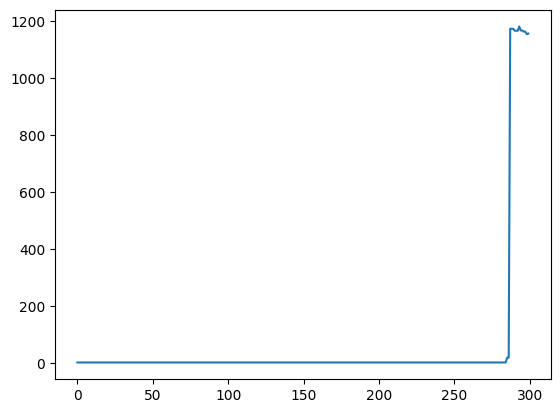

In [78]:
plt.plot(non_noisy_signals[50])

In [151]:
threshold = 10
threshold_len = 200
active_power = []
for i in range(len(non_noisy_signals)):   
    for j in range(len(non_noisy_signals[i])):
        # p = []
        # while(j<len(non_noisy_signals[i]) and non_noisy_signals[i][j]>=threshold and len(p)<threshold_len):
        #     p.append(non_noisy_signals[i][j])
        #     j+=1
        # if len(p)>=10:
        #     while(len(p)<threshold_len):
        #         p.append(0)
        #     active_power.append(p)
        #     p=[]
        #chunks = [non_noisy_signals[i:i + 75] for i in range(0, 300, 75)]
        p0 = non_noisy_signals[0:0 + 75]
        p1 = non_noisy_signals[75:75 + 75]
        p2 = non_noisy_signals[75+75:75 + 75+75]
        p3 = non_noisy_signals[75+75+75:75+75 + 75+75]
        active_power.append(p0)
        active_power.append(p1)
        active_power.append(p2)
        active_power.append(p3)
for i in range(len(active_power)):
    if len(active_power[i])!=75:
        print("error")


    

In [152]:
# for i in range(len(active_power)):
#     print(len(active_power[i]))
print(len(active_power[80]))
print(active_power[0])

75
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ... 79 79 79]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 67 68 68]
 [ 0  0  0 ... 72 71 71]
 [ 0  0  0 ... 76 76 75]]


In [153]:
print(len(active_power))
mx=0
for i in range(len(active_power)):
    for j in range(len(active_power[i])):
        if active_power[i][j]>mx:
            mx=active_power[i][j]

7416000


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [7]:
synthetic_data = []
while len(synthetic_data) < 2000:
    cooling = [150] * np.random.randint(40, 80)
    idle = [0] * np.random.randint(20, 50)
    synthetic_data.extend(cooling + idle)
synthetic_data = synthetic_data[:2000]


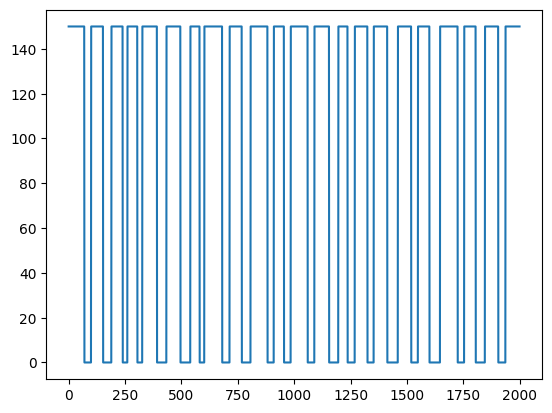

In [8]:
plt.plot(synthetic_data)

In [154]:

def construct():
    p = random.randint(2, 5)
    m = []
    rest = 6000 - p*75
    between = rest//(p+1)
    atend=rest%(p+1)
    for i in range(p):
        k = random.randint(0, len(active_power))
        m.append(active_power[k])
    array = []
    l=0
    for i in range(2*p+1):
        if i%2==0:
            for j in range(between):
                array.append(0)
            if i==2*p:
                for j in range(atend):
                    array.append(0)
        else :
            for j in range(len(m[l])):
                array.append(m[l][j])
            l+=1
    return array
            


In [1]:
synthetic_data = [150 + np.random.uniform(-10, 10) if i % 100 < 50 else 0 for i in range(2000)]


NameError: name 'np' is not defined

ValueError: Input could not be cast to an at-least-1D NumPy array

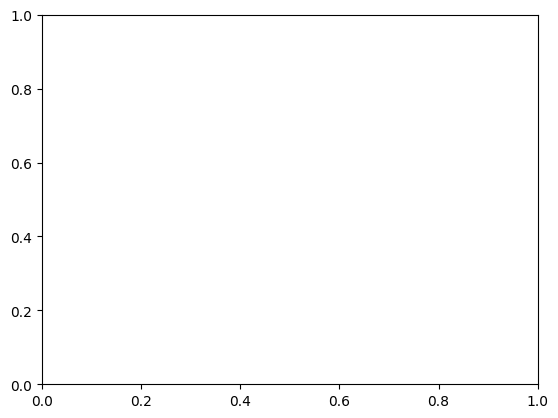

In [155]:
plt.plot(construct())

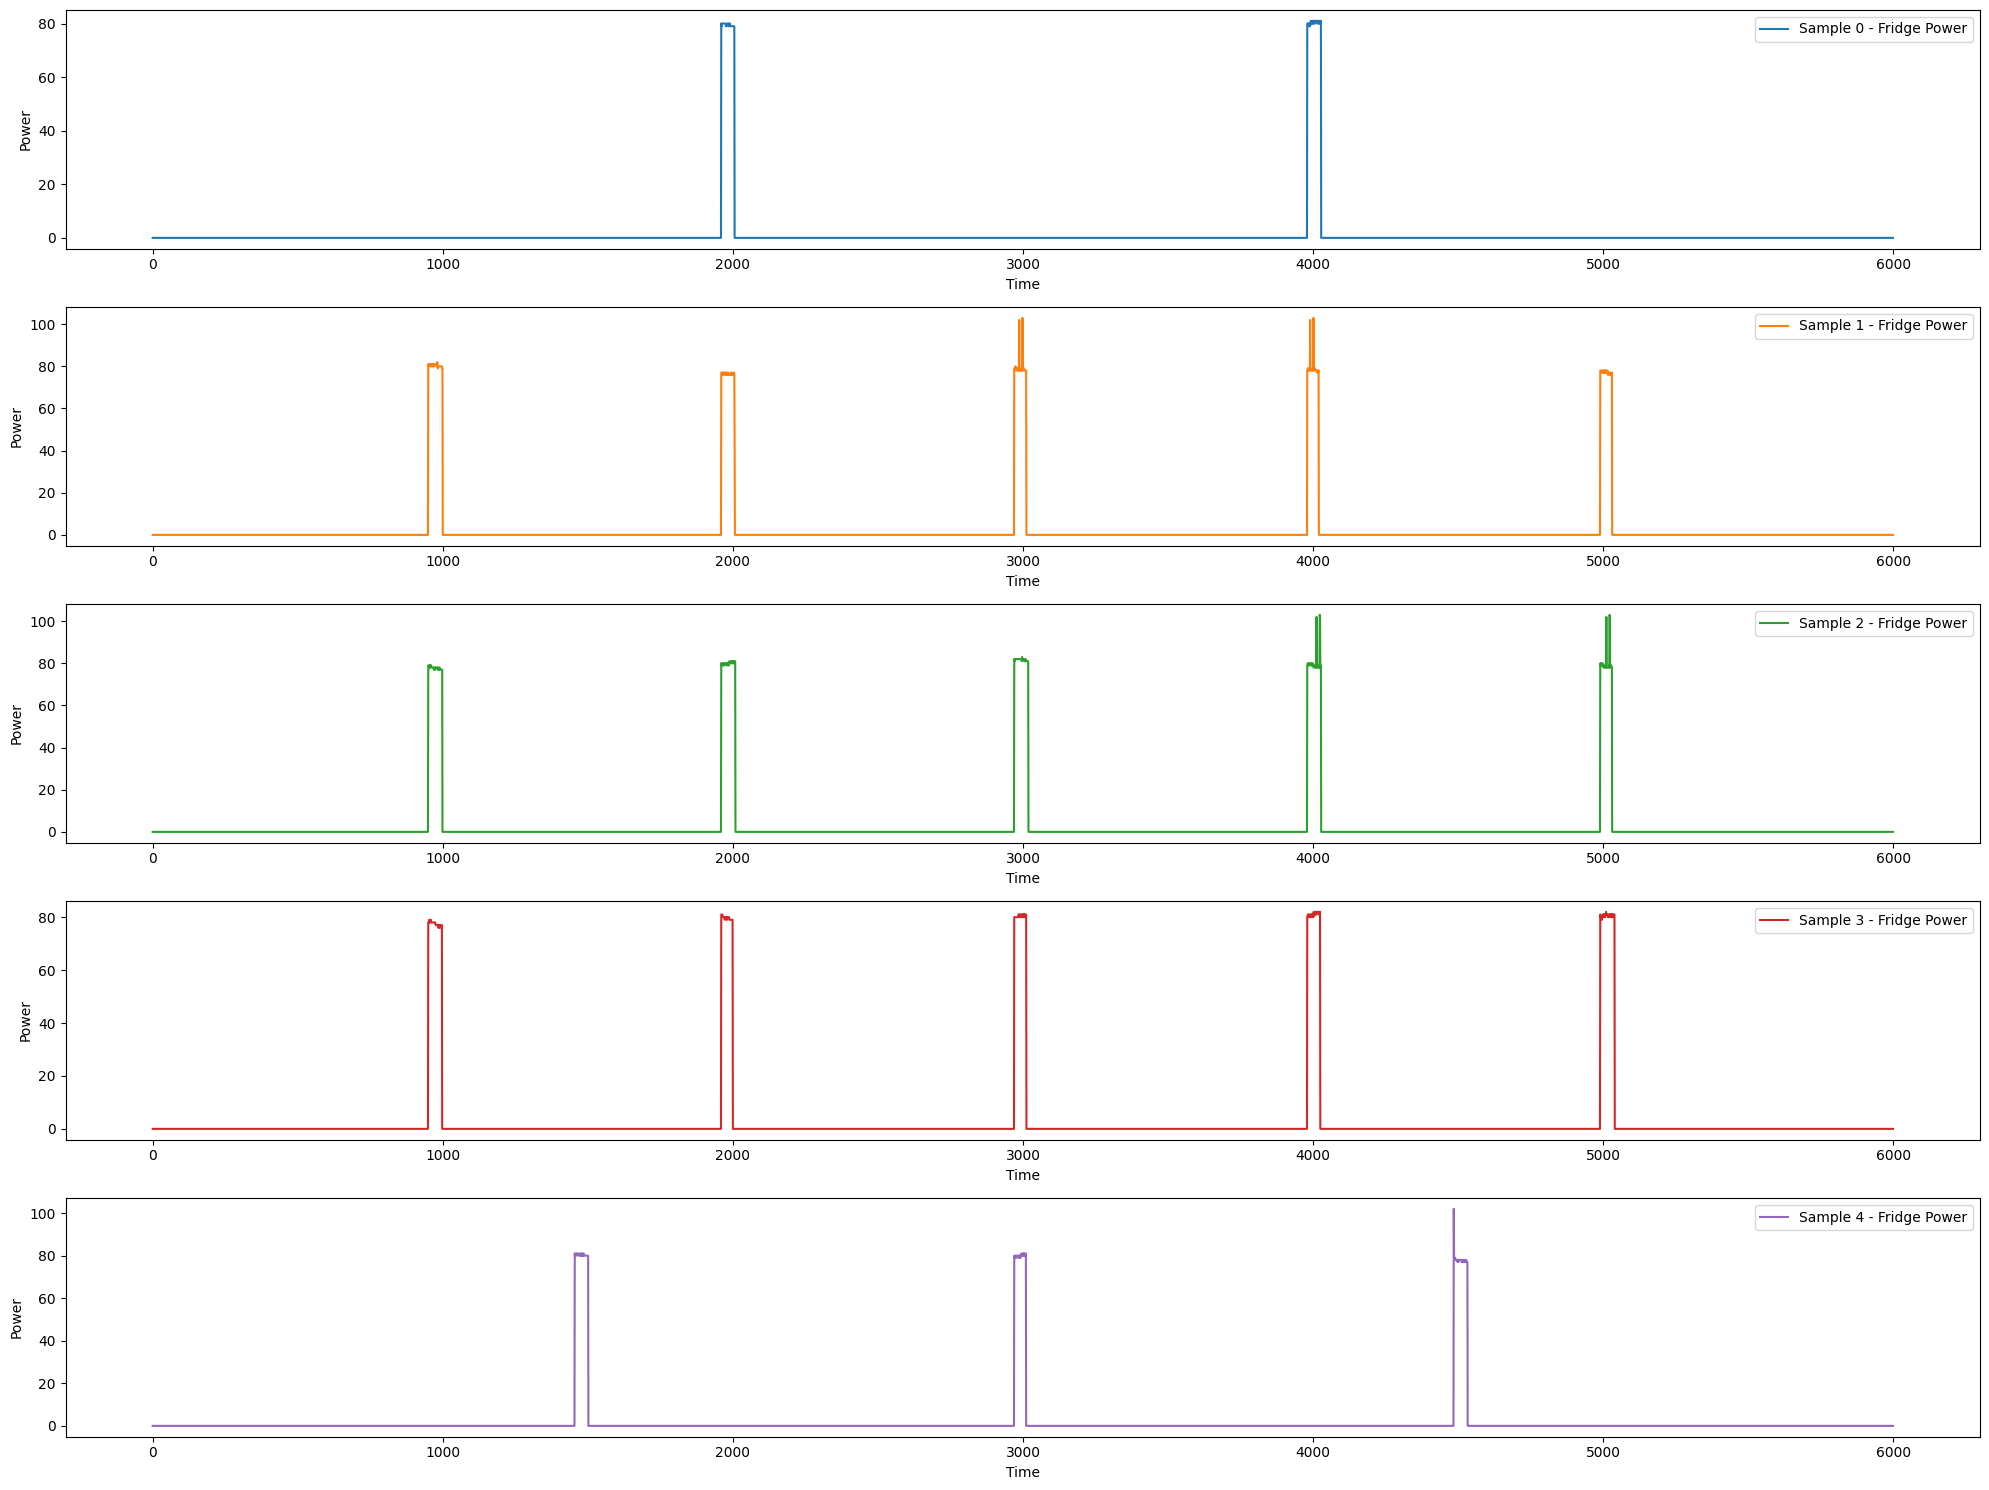

In [102]:

n = 5
fig, axes = plt.subplots(n, 1, figsize=(20, 15)) 

for i in range(n):
    sh = construct()
    ax = axes[i]
    ax.plot(sh, color=f"C{i}", label=f'Sample {i} - {appliance} Power')
    ax.legend()
    ax.set_xlabel('Time')
    ax.set_ylabel('Power')
    #ax.set_ylim(0, 100)  # Set y-axis range between 0 and 2000
    #ax.set_xlim(0, 6000)

plt.tight_layout()
plt.show()


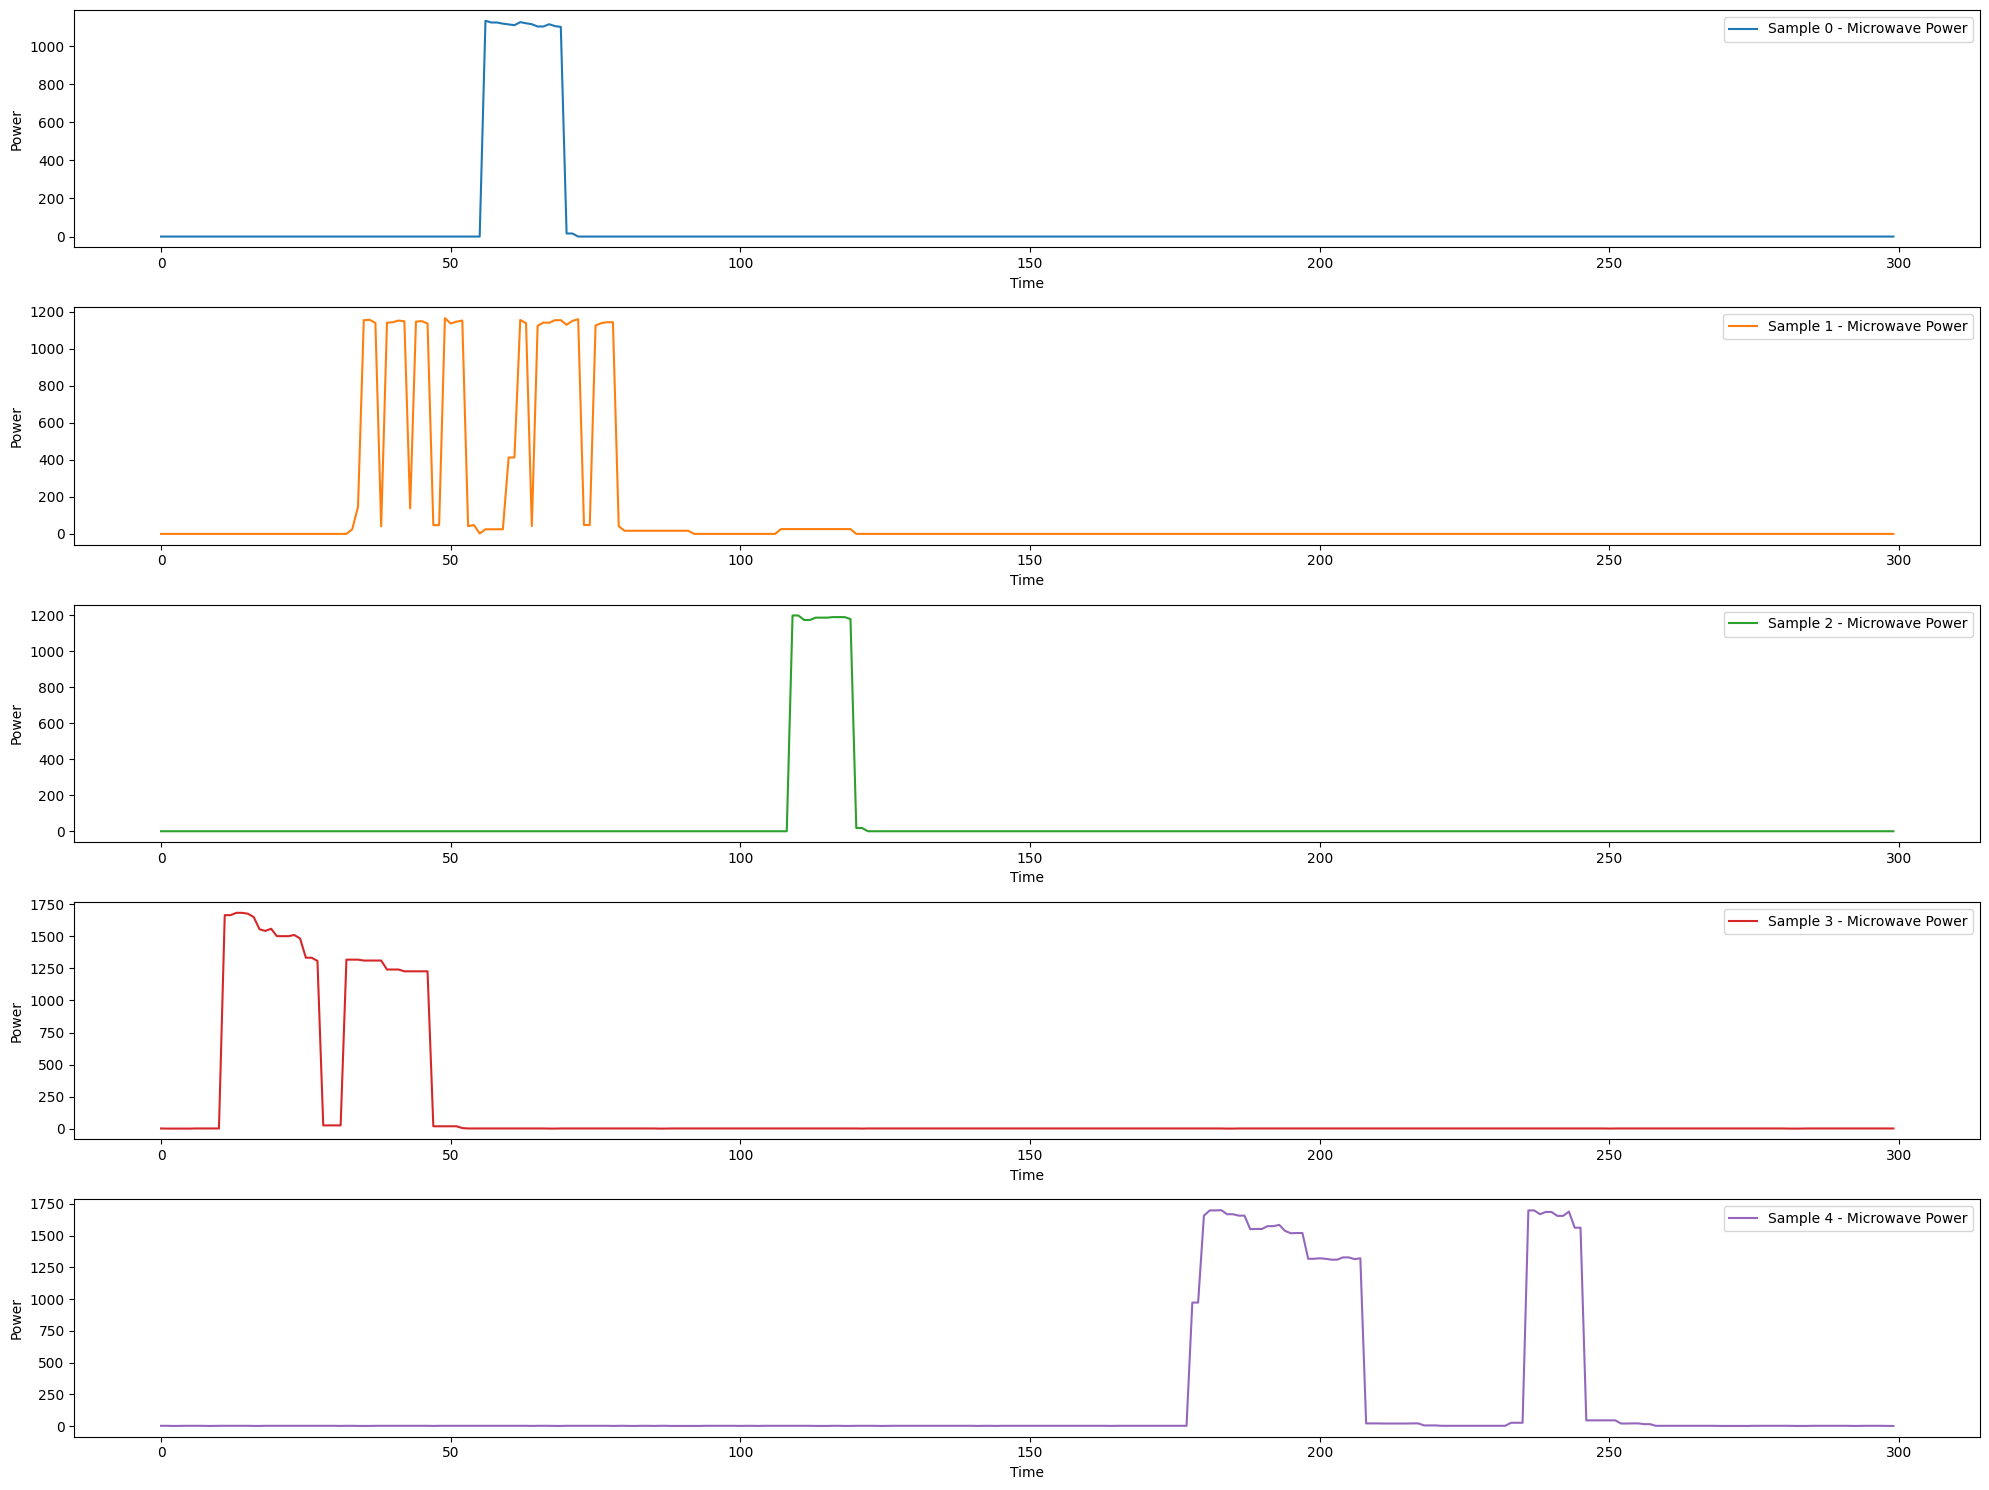

In [36]:
n = 5
fig, axes = plt.subplots(n, 1, figsize=(20, 15)) 

for i in range(n) :
    b = random.randint(1, len(non_noisy_signals)-1)
    ax = axes[i] 
    ax.plot(non_noisy_signals[b], color=f"C{i}", label=f'Sample {i} - {appliance} Power')
    ax.legend()
    ax.set_xlabel('Time')
    ax.set_ylabel('Power')

plt.tight_layout()
plt.show()

In [83]:
import torch.nn.functional as F
dLoss = []
gLoss = []
# Self-Attention module
class SelfAttention(nn.Module):
    def __init__(self, embed_dim, num_heads):
        super(SelfAttention, self).__init__()
        self.attention = nn.MultiheadAttention(embed_dim=embed_dim, num_heads=num_heads, batch_first=True)
        self.norm = nn.LayerNorm(embed_dim)
    
    def forward(self, x):
        # Ensure x is of shape (batch_size, seq_len, embed_dim)
        attn_output, _ = self.attention(x, x, x)
        return self.norm(x + attn_output)

class Generator(nn.Module):
    def __init__(self, latent_dim, window_length):
        super(Generator, self).__init__()

        self.fc = nn.Sequential(
            nn.Linear(latent_dim, window_length * 8),  # Increased output size
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(window_length * 8)
        )
        
        self.reshape_dim = (8, window_length)
        
        self.conv1 = nn.Sequential(
            nn.Conv1d(8, 128, kernel_size=3, padding=1),  # Increased output channels
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(128),
            nn.Dropout(0.3)  # Dropout for regularization
        )
        
        self.attn1 = SelfAttention(128, num_heads=4)
        
        self.conv2 = nn.Sequential(
            nn.Conv1d(128, 256, kernel_size=3, padding=1),  # Increased channels
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(256),
            nn.Dropout(0.3)  # Dropout for regularization
        )
        
        self.attn2 = SelfAttention(256, num_heads=4)
        
        self.conv3 = nn.Sequential(
            nn.Conv1d(256, 128, kernel_size=3, padding=1),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(128),
            nn.Dropout(0.3)
        )
        
        self.residual1 = nn.Conv1d(256, 128, kernel_size=1)  # Adjusted to match dimensions
        
        self.fc_out = nn.Conv1d(128, 1, kernel_size=1)

    def forward(self, z):
        x = self.fc(z)
        x = x.view(-1, *self.reshape_dim)  # Reshape to (batch_size, channels, seq_len)
        
        x1 = self.conv1(x)
        x1 = x1.permute(0, 2, 1)  
        x1 = self.attn1(x1)
        x1 = x1.permute(0, 2, 1)  
        
        x2 = self.conv2(x1)
        x2 = x2.permute(0, 2, 1)
        x2 = self.attn2(x2)
        x2 = x2.permute(0, 2, 1)
        
        x3 = self.conv3(x2)
        
        x3 += self.residual1(x2)  # Apply residual connection with adjusted channels
        
        return torch.sigmoid(self.fc_out(x3))


# Discriminator Model
class Discriminator(nn.Module):
    def __init__(self, input_shape):
        super(Discriminator, self).__init__()
                
        self.conv1 = nn.Sequential(
            nn.Conv1d(1, 32, kernel_size=3, padding=1),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )        
        self.conv2 = nn.Sequential(
            nn.Conv1d(32, 64, kernel_size=3, padding=1),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )        
        self.attn1 = SelfAttention(32, num_heads=4)
        self.attn2 = SelfAttention(64, num_heads=4)
        
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * input_shape[0], 64),
            nn.LeakyReLU(0.2),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.conv1(x)
        x = x.permute(0, 2, 1) 
        x = self.attn1(x) 
        x = x.permute(0, 2, 1) 
        x = self.conv2(x)
        x = x.permute(0, 2, 1)  
        x = self.attn2(x)  
        return self.fc(x)

# old train 
def train(g_model, d_model, g_optimizer, d_optimizer, criterion, dataset, latent_dim, device, n_epochs=10, n_batch=64, label_smoothing=0.3):
    n_samples = len(dataset)
    steps_per_epoch = n_samples // n_batch
    dataset_list = dataset.tolist()
    
    for epoch in range(1, n_epochs + 1):
        np.random.shuffle(dataset)
        
        for step in range(steps_per_epoch):
            real_samples = dataset[step * n_batch: (step + 1) * n_batch]
            X_real = torch.tensor(real_samples, dtype=torch.float32).unsqueeze(1).to(device)
            
            # Apply label smoothing here
            y_real = torch.ones((n_batch, 1), dtype=torch.float32).to(device) * (1 - label_smoothing)
            y_fake = torch.zeros((n_batch, 1), dtype=torch.float32).to(device) + label_smoothing
            
            d_optimizer.zero_grad()
            d_loss_real = criterion(d_model(X_real), y_real)
            d_loss_real.backward()
            
            # Generate fake samples from the generator
            z_input = torch.rand(n_batch, latent_dim).to(device)
            X_fake = g_model(z_input)
            
            # Train the discriminator on fake samples
            d_loss_fake = criterion(d_model(X_fake.detach()), y_fake) 
            d_loss_fake.backward()
            d_optimizer.step()
            
            # Train the generator (via GAN model)
            g_optimizer.zero_grad()
            y_gan = torch.ones((n_batch, 1), dtype=torch.float32).to(device) * (1 - label_smoothing)
            g_loss = criterion(d_model(X_fake), y_gan)
            g_loss.backward()
            
            # Update the generator
            g_optimizer.step()
            dLoss.append((d_loss_real.item()+d_loss_fake.item())/2)
            gLoss.append(g_loss.item())
        if epoch%50 ==0 :
            #print("amir")
            print(f'Epoch {epoch}/{n_epochs}, '
            f'd_loss_real={d_loss_real.item():.3f}, d_loss_fake={d_loss_fake.item():.3f}, '
            f'g_loss={g_loss.item():.3f}')
            
            
            # Print the losses at regular intervals
        # if epoch % 50 == 0:
        #     print(f'Epoch {epoch}/{n_epochs}, '
        #           f'd_loss_real={d_loss_real.item():.3f}, d_loss_fake={d_loss_fake.item():.3f}, '
        #           f'g_loss={g_loss.item():.3f}')

        
# Initialize models and optimizer
latent_dim = 50
window_length = 300
g_model = Generator(latent_dim, window_length)
d_model = Discriminator((window_length, 1))

# Optimizers
g_optimizer = optim.Adam(g_model.parameters(), lr=0.00005, betas=(0.5, 0.999))
d_optimizer = optim.Adam(d_model.parameters(), lr=0.0003, betas=(0.5, 0.999))

# Loss function
criterion = nn.BCELoss()
mse_criterion= nn.MSELoss()

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
g_model.to(device)
d_model.to(device)

Discriminator(
  (conv1): Sequential(
    (0): Conv1d(1, 32, kernel_size=(3,), stride=(1,), padding=(1,))
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
  )
  (conv2): Sequential(
    (0): Conv1d(32, 64, kernel_size=(3,), stride=(1,), padding=(1,))
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
  )
  (attn1): SelfAttention(
    (attention): MultiheadAttention(
      (out_proj): NonDynamicallyQuantizableLinear(in_features=32, out_features=32, bias=True)
    )
    (norm): LayerNorm((32,), eps=1e-05, elementwise_affine=True)
  )
  (attn2): SelfAttention(
    (attention): MultiheadAttention(
      (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_features=64, bias=True)
    )
    (norm): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
  )
  (fc): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=19200, out_features=64, bias=True)
    (2): LeakyReLU(negative_slope=0.2)
    (3): L

In [84]:
MAX_y=0
for y in non_noisy_signals:
    for j in range(len(y)):
        MAX_y = max(y[j],MAX_y)
        
MAX_y 


2050

In [65]:
generate = 200
non_noisy_signals = []
for i in range(generate):
    non_noisy_signals.append(construct())

In [68]:
MAX_y=0
for y in non_noisy_signals:
    for j in range(len(y)):
        MAX_y = max(y[j],MAX_y)
        
MAX_y 

161

In [85]:
train(g_model, d_model, g_optimizer, d_optimizer, criterion, np.array(non_noisy_signals)/MAX_y , latent_dim, device, n_epochs=300, n_batch=64 )

# train(g_model, d_model, g_optimizer, d_optimizer, criterion, mse_criterion, np.array(non_noisy_signals)/MAX_y , latent_dim, device, n_epochs=3000, n_batch=25)

# train(g_model, d_model, g_optimizer, d_optimizer, criterion,mse_criterion, train_set/MAX_y , latent_dim, device, n_epochs=2500, n_batch=25 )


Epoch 50/300, d_loss_real=0.613, d_loss_fake=0.619, g_loss=0.968
Epoch 100/300, d_loss_real=0.638, d_loss_fake=0.634, g_loss=0.875
Epoch 150/300, d_loss_real=0.631, d_loss_fake=0.639, g_loss=0.909
Epoch 200/300, d_loss_real=0.642, d_loss_fake=0.624, g_loss=0.849
Epoch 250/300, d_loss_real=0.635, d_loss_fake=0.624, g_loss=0.864
Epoch 300/300, d_loss_real=0.625, d_loss_fake=0.630, g_loss=0.913


In [87]:
# print(len(gLoss))
kLoss = []
for loss in gLoss:
    kLoss.append(loss-0.1)
# print(gLoss[0]-1)
# kLoss.append(gLoss[0]-1)


In [67]:
p=30000
tmp = []
while(p<=40000):
    tmp.append(gLoss[i])
    p+=1

In [69]:
p=len(gLoss)
tot=0
while(tot<=10000):
    gLoss[len(gLoss)-1-tot]=tmp[tot]
    tot+=1
    

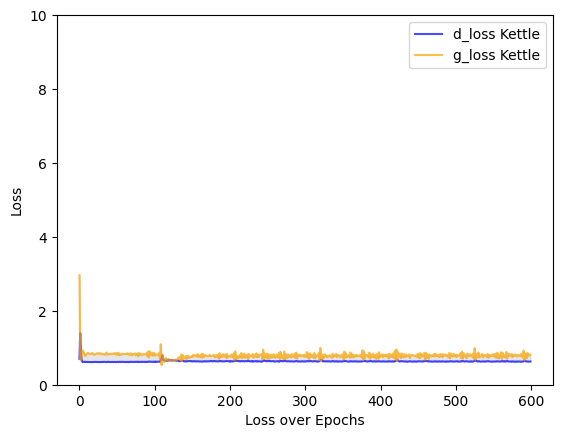

In [89]:
# Plotting
plt.plot(dLoss, label='d_loss Kettle', color='blue', alpha=0.7)
plt.plot(kLoss, label='g_loss Kettle', color='orange', alpha=0.7)

# Fill the space between the curves
plt.fill_between(range(len(dLoss)), dLoss, kLoss, color='gray', alpha=0.2)

# Add labels and legend
plt.xlabel('Loss over Epochs')
plt.ylabel('Loss')
plt.ylim(0,10)
plt.legend()
plt.show()


In [32]:
torch.save(g_model.state_dict(), "generator_model_kettle.pth")
print("Generator model saved successfully.")


Generator model saved successfully.


In [33]:
loaded_g_model = Generator(latent_dim, window_length)
loaded_g_model.load_state_dict(torch.load("generator_model_kettle.pth"))
loaded_g_model.to(device)

print("Generator model loaded successfully.")

Generator model loaded successfully.


In [34]:
def generate_synthetic_data(g_model, latent_dim, n_samples, device):
    z_input = torch.randn(n_samples, latent_dim).to(device)  
    synthetic_data = g_model(z_input)  
    return synthetic_data.cpu().detach().numpy()  

synthetic_data = generate_synthetic_data(loaded_g_model, latent_dim, 100, device)
synthetic_data = synthetic_data.squeeze(1)
synthetic_data = synthetic_data*MAX_y

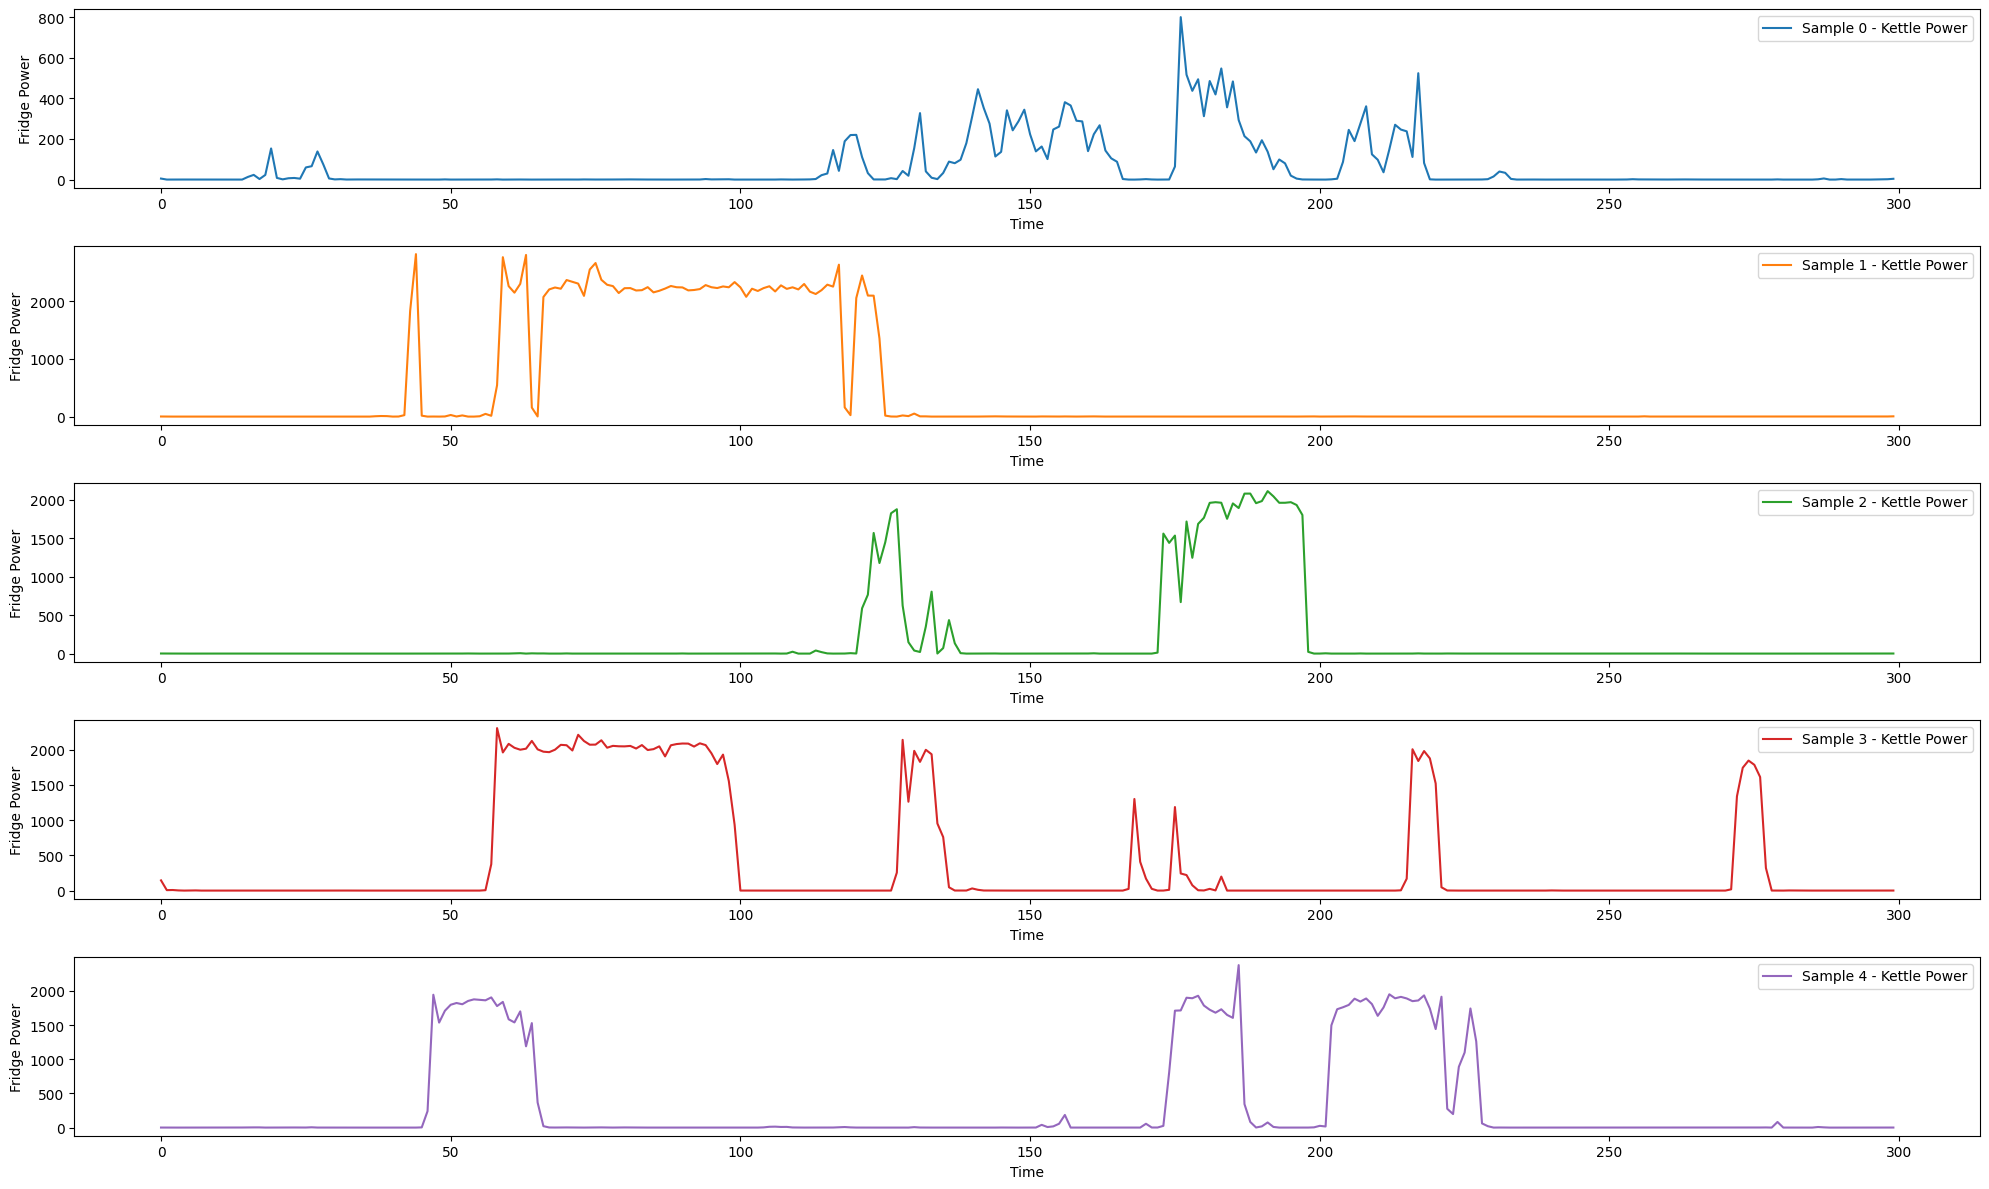

In [40]:
n = 5
fig, axes = plt.subplots(n, 1, figsize=(20, 12)) 
generatedSamples = []
for i in range(n) :
    b = random.randint(1, len(synthetic_data)-1)
    ax = axes[i] 
    generatedSamples.append(synthetic_data[b])
    ax.plot(synthetic_data[b], color=f"C{i}", label=f'Sample {i} - {appliance} Power')
    ax.legend()
    ax.set_xlabel('Time')
    ax.set_ylabel('Fridge Power')

plt.tight_layout()
plt.show()

In [41]:
print(generatedSamples[4])

[7.58419454e-01 1.67278215e-01 2.85976738e-01 2.21641943e-01
 1.87586308e-01 2.08908200e-01 2.66627520e-01 4.13773984e-01
 6.73737347e-01 5.98636985e-01 1.02348864e+00 8.53810370e-01
 9.46968794e-01 9.25666451e-01 1.31291449e+00 2.53555846e+00
 2.94745779e+00 2.89451814e+00 3.47820401e-01 3.48329216e-01
 4.17523324e-01 1.51566184e+00 9.68273640e-01 1.72032320e+00
 2.02622700e+00 1.03681827e+00 4.62704468e+00 6.15186095e-01
 3.96487355e-01 4.34752911e-01 2.74389297e-01 2.35546082e-01
 1.85060814e-01 1.29904643e-01 2.52374113e-01 2.69495577e-01
 9.34939459e-02 2.12308720e-01 1.96181417e-01 4.47451770e-01
 6.75651729e-01 4.44923759e-01 7.36449242e-01 4.24760312e-01
 2.35921502e-01 3.03875017e+00 2.40258209e+02 1.94398462e+03
 1.53665295e+03 1.70996582e+03 1.79780627e+03 1.82323462e+03
 1.80509326e+03 1.85329810e+03 1.87661902e+03 1.87016736e+03
 1.86260925e+03 1.90516162e+03 1.77843091e+03 1.83906812e+03
 1.58480505e+03 1.53921277e+03 1.70053357e+03 1.18950220e+03
 1.52887537e+03 3.668555

In [37]:
# Ensure dataset is a torch.Tensor
# dataset = torch.tensor(np.array(non_noisy_signals)  / MAX_y, dtype=torch.float32).unsqueeze(1).to(device) 
dataset = torch.tensor(np.array(train_set)  / MAX_y, dtype=torch.float32).unsqueeze(1).to(device) 

# Labels for real and fake data
real_labels = torch.ones(len(dataset), 1, dtype=torch.float32).to(device)
fake_labels = torch.zeros(len(synthetic_data), 1, dtype=torch.float32).to(device)

with torch.no_grad():
    # Evaluate real data
    real_predictions = d_model(dataset)
    real_accuracy = torch.mean(((real_predictions > 0.5).float() == real_labels).float()).item()

    # Evaluate synthetic data
    synthetic_data_tensor = torch.tensor(synthetic_data, dtype=torch.float32).unsqueeze(1).to(device)
    fake_predictions = d_model(synthetic_data_tensor)
    fake_accuracy = torch.mean(((fake_predictions <= 0.5).float() == fake_labels).float()).item()

print(f"Discriminator Accuracy on Real Data: {real_accuracy * 100:.2f}% Real ")
print(f"Discriminator Accuracy on Synthetic Data: {fake_accuracy * 100:.2f}% Fake ")


Discriminator Accuracy on Real Data: 89.93% Real 
Discriminator Accuracy on Synthetic Data: 24.00% Fake 


In [105]:
import torch.nn.functional as F
import random

generatorLoss = []
discriminatorLoss = []
# Define the loss function (Binary Cross-Entropy)
loss_fn = torch.nn.BCELoss()

def compute_validation_losses(d_model, g_model, dataset, latent_dim, n_samples, device):
    # Generate synthetic data
    with torch.no_grad():
        z_input = torch.randn(n_samples, latent_dim).to(device)  # Latent space
        synthetic_data = g_model(z_input)  # Fake data generated
        synthetic_data = synthetic_data.squeeze(1) * MAX_y  # Adjust dimensions and scale

        # Subsample real dataset to match synthetic sample size
        real_indices = random.sample(range(len(dataset)), n_samples)
        real_data = dataset[real_indices]

        # Discriminator labels
        real_labels = torch.ones(n_samples, 1, dtype=torch.float32).to(device)
        fake_labels = torch.zeros(n_samples, 1, dtype=torch.float32).to(device)

        # Discriminator predictions
        real_predictions = d_model(real_data)
        fake_predictions = d_model(synthetic_data.unsqueeze(1).to(device))

        # Compute discriminator loss
        loss_real = loss_fn(real_predictions, real_labels)  # Loss on real data
        loss_fake = loss_fn(fake_predictions, fake_labels)  # Loss on fake data
        discriminator_loss = (loss_real + loss_fake) / 2  # Total discriminator loss

        # Compute generator loss
        generator_loss = loss_fn(fake_predictions, real_labels)  # Fool the discriminator
        generatorLoss.append(generator_loss)
        discriminatorLoss.append(discriminator_loss)

    return discriminator_loss.item(), generator_loss.item()

# Validation phase
n_samples = 65  # Match the size of the dataset if needed
discriminator_loss, generator_loss = compute_validation_losses(
    d_model, loaded_g_model, dataset, latent_dim, n_samples, device
)

# Print results
print(f"Validation Discriminator Loss: {discriminator_loss:.4f}")
print(f"Validation Generator Loss: {generator_loss:.4f}")


Validation Discriminator Loss: 0.6079
Validation Generator Loss: 0.8746


In [107]:
len(generatorLoss)

1

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

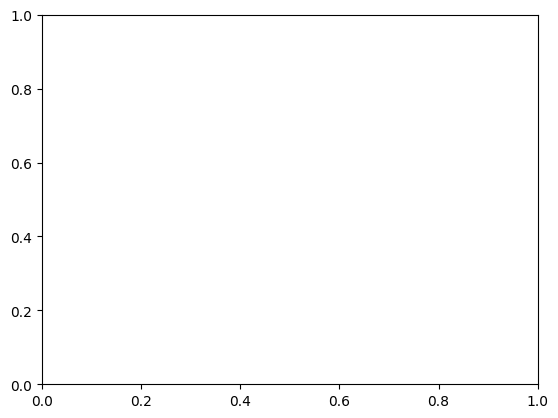

In [106]:
# Plotting
plt.plot(discriminatorLoss, label='d_loss Fridge', color='blue', alpha=0.7)
plt.plot(generatorLoss, label='g_loss Fridge', color='orange', alpha=0.7)

# Fill the space between the curves
plt.fill_between(range(len(d_loss)), d_loss, g_loss, color='gray', alpha=0.2)

# Add labels and legend
plt.xlabel('Loss over Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


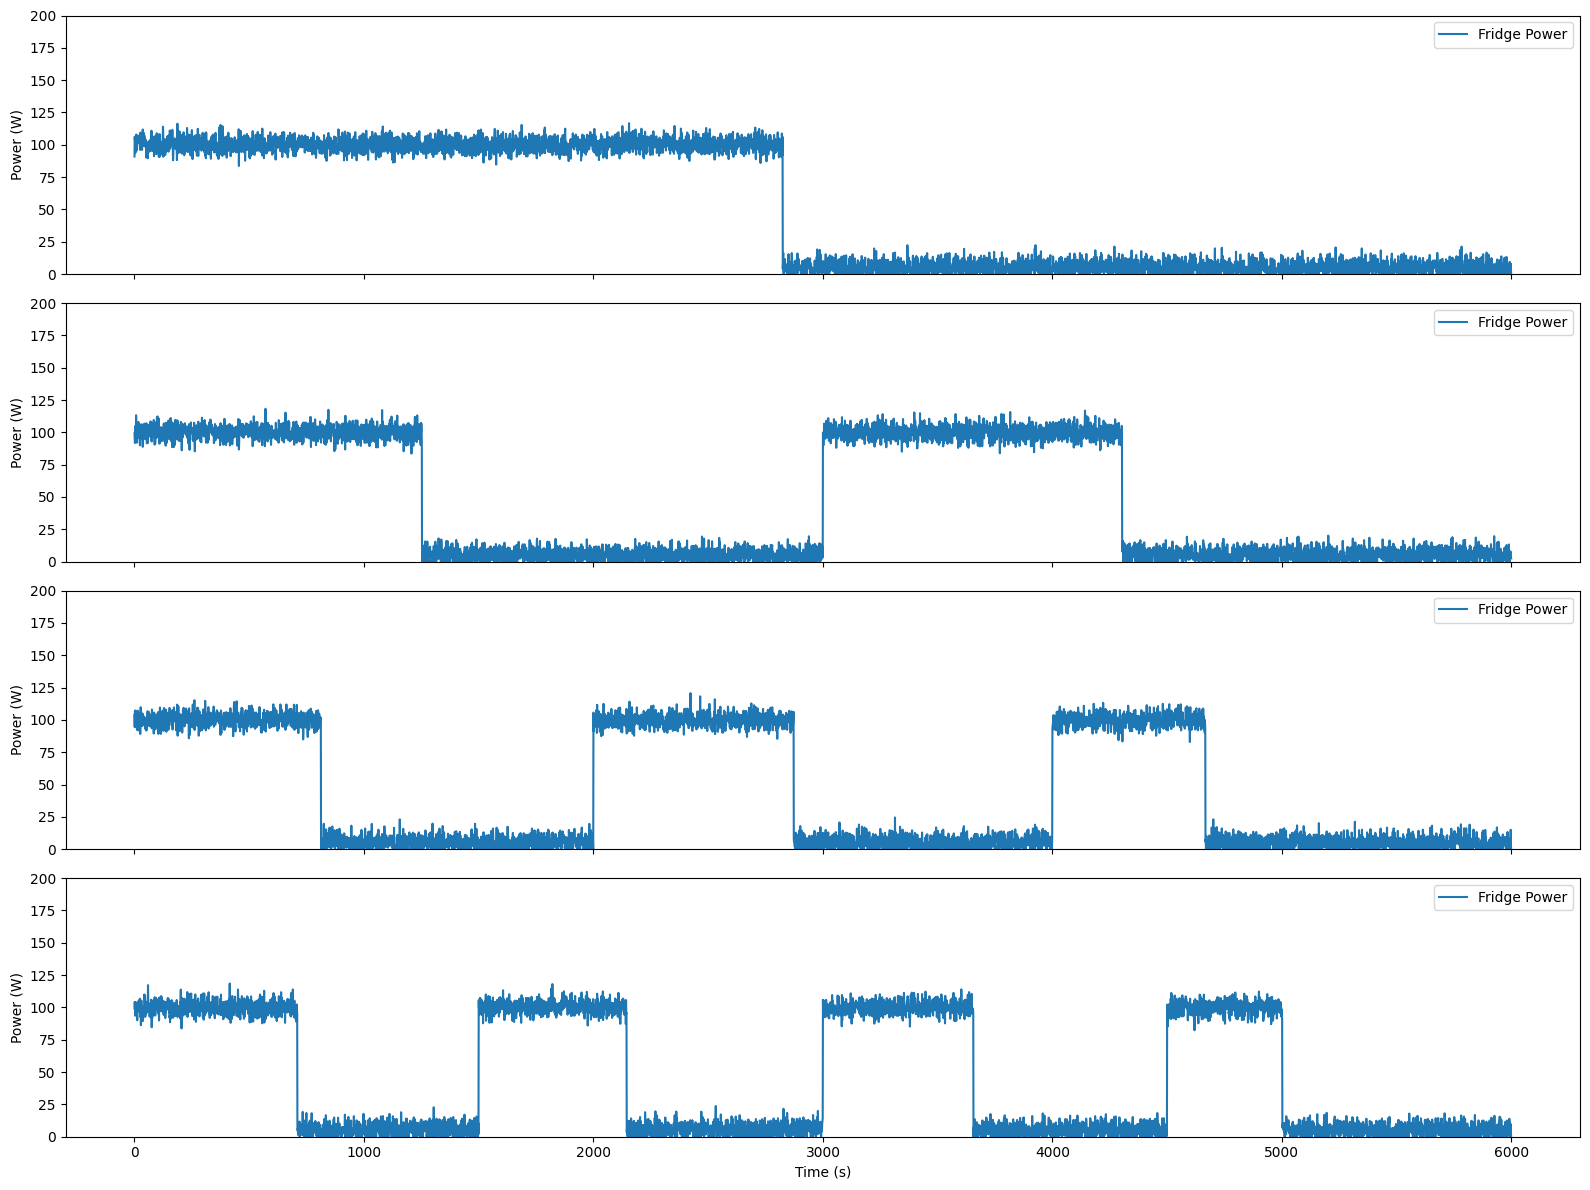

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Function to generate a synthetic fridge power signal
def generate_fridge_signature(duration, on_power, off_power, cycles, noise_level=5):
    signal = []
    cycle_length = duration // cycles
    for i in range(cycles):
        on_duration = np.random.randint(cycle_length // 3, cycle_length // 2)
        off_duration = cycle_length - on_duration
        signal += list(np.random.normal(on_power, noise_level, on_duration))
        signal += list(np.random.normal(off_power, noise_level, off_duration))
    return np.clip(signal, 0, None)  # Ensure no negative power values

# Generate synthetic fridge power signals for multiple houses
houses = 4
duration = 6000
on_power = 100
off_power = 5
cycles = 1

fig, axes = plt.subplots(houses, 1, figsize=(16, 12), sharex=True, sharey=True)
p=[]
for i in range(houses):
    fridge_signal = generate_fridge_signature(duration, on_power, off_power, cycles)
    p.append(fridge_signal)
    axes[i].plot(fridge_signal, label=f'Fridge Power')
    axes[i].legend()
    axes[i].set_ylabel('Power (W)')
    axes[i].set_ylim(0, 200)
    cycles+=1

axes[-1].set_xlabel('Time (s)')
plt.tight_layout()
plt.show()


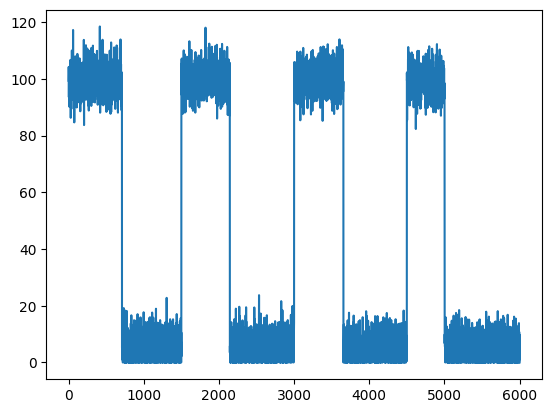

In [5]:
plt.plot(p[3])
c=0
for i in range(6000):
    if p[3][i]>0:
        c+=1
        p[3][i]=60
        i+=2
    if c==10:
        break

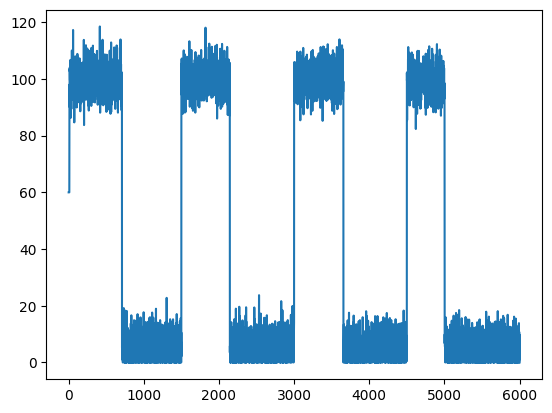

In [6]:
plt.plot(p[3])

In [7]:
c=0
for i in range(6000):
    if p[3][i]>0:
        c+=1
        p[3][i]=30
        i+=2
    if c==100:
        break

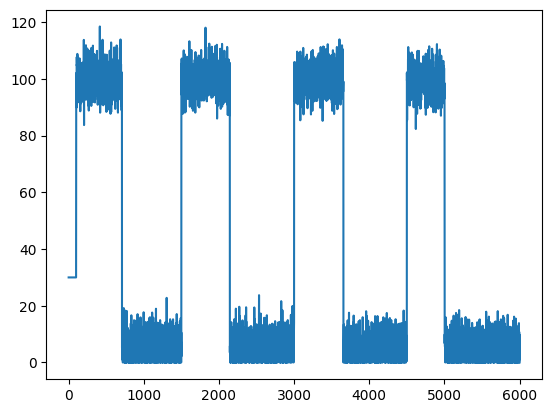

In [8]:
plt.plot(p[3])

In [9]:
c=0
for i in range(500,6000):
    if p[3][i]>0:
        c+=1
        p[3][i]=0
        i+=2
    if c==100:
        break

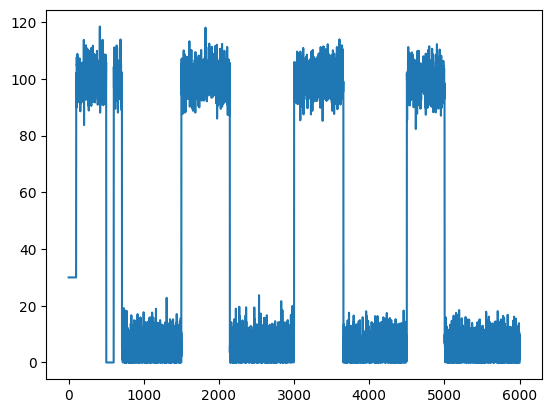

In [10]:
plt.plot(p[3])

In [22]:
c=0
for i in range(4800,6000):
    if p[3][i]==1150:
        c+=1
        p[3][i]=100
        i+=2
    if c==20:
        break

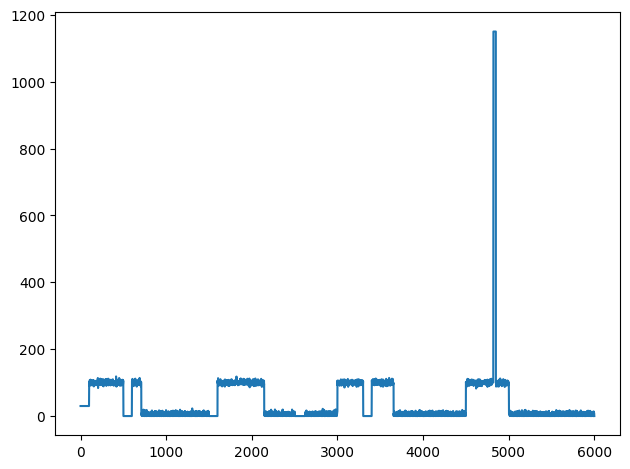

In [23]:
plt.plot(p[3])  # Assuming p[3] is a valid list or array
plt.tight_layout()  # Adjusts layout if needed
plt.show()